In [1]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import astropy
from astropy.time import Time
import healpy as hp
from astropy.coordinates import SkyCoord
from astropy import units as u, constants as c
from chandra import outerhalo as oh
import os
from scipy import stats

plt.style.use('~/vedant.mplstyle')
%config InlineBackend.figure_format='retina'



In [2]:
h3 = Table.read('/Users/vedantchandra/0_research/data/h3/rcat_V4.0.5.d20221116_MSG.h5')
for key in list(h3.columns):
    h3.rename_column(key, 'h3_' + key)

### Get Catalogs

In [197]:
cmd = 'rsync -vzr ody:/n/holyscratch01/conroy_lab/vchandra/mage/catalogs \
/Users/vedantchandra/0_research/data/mage/'

print(cmd)

os.system(cmd)

rsync -vzr ody:/n/holyscratch01/conroy_lab/vchandra/mage/catalogs /Users/vedantchandra/0_research/data/mage/
receiving file list ... done
catalogs/h3cal_acat.fits
catalogs/h3cal_rcat_V0.0_MSG.fits
catalogs/mage_acat.fits
catalogs/mage_rcat_V0.01_MSG.fits
catalogs/mage_rcat_V0.03_MSG.fits
catalogs/mage_rcat_V0.04_MSG.fits
catalogs/mage_rcat_V0.05_MSG.fits
catalogs/mage_rcat_V0.06_MSG.fits
catalogs/mage_rcat_V0.0_MSG.fits
catalogs/rvs_acat.fits
catalogs/rvs_rcat_V0.0_MSG.fits
catalogs/spall.fits
catalogs/targetdb_2023a.fits
catalogs/tdb/targetdb_2022b.fits
catalogs/tdb/targetdb_2023a.fits
catalogs/xgall/mage_xgall_0.fits
catalogs/xgall/mage_xgall_1.fits
catalogs/xgall/mage_xgall_10.fits
catalogs/xgall/mage_xgall_11.fits
catalogs/xgall/mage_xgall_12.fits
catalogs/xgall/mage_xgall_13.fits
catalogs/xgall/mage_xgall_14.fits
catalogs/xgall/mage_xgall_15.fits
catalogs/xgall/mage_xgall_16.fits
catalogs/xgall/mage_xgall_17.fits
catalogs/xgall/mage_xgall_18.fits
catalogs/xgall/mage_xgall_19.fits


0

### Get Plots

In [3]:
cmd = 'rsync -vzr ody:/n/holyscratch01/conroy_lab/vchandra/mage/plots/mage/V0.06 \
/Users/vedantchandra/0_research/data/mage/plots/'

print(cmd)

os.system(cmd)

rsync -vzr ody:/n/holyscratch01/conroy_lab/vchandra/mage/plots/mage/V0.06 /Users/vedantchandra/0_research/data/mage/plots/


ssh_askpass: exec(/usr/X11R6/bin/ssh-askpass): No such file or directory
ssh_askpass: exec(/usr/X11R6/bin/ssh-askpass): No such file or directory
ssh_askpass: exec(/usr/X11R6/bin/ssh-askpass): No such file or directory
ssh_askpass: exec(/usr/X11R6/bin/ssh-askpass): No such file or directory
ssh_askpass: exec(/usr/X11R6/bin/ssh-askpass): No such file or directory
ssh_askpass: exec(/usr/X11R6/bin/ssh-askpass): No such file or directory
rsync error: received SIGINT, SIGTERM, or SIGHUP (code 20) at /System/Volumes/Data/SWE/macOS/BuildRoots/5b2e67f8af/Library/Caches/com.apple.xbs/Sources/rsync/rsync-55/rsync/rsync.c(244) [receiver=2.6.9]


5120

### Load Catalogs

In [238]:
hgiants = (

    (h3['FLAG'] == 0)&
    (h3['logg'] < 3.5)&
    (h3['SNR'] > 3)

)

In [343]:
catalog = 'mage'
version = 'V0.06'

In [344]:
mage = Table.read('/Users/vedantchandra/0_research/data\
/mage/catalogs/%s_rcat_%s_MSG.fits' % (catalog, version))

In [345]:
mage_nogal = Table.read('/Users/vedantchandra/0_research/data/\
mage/catalogs/%s_rcat_V0.03_MSG.fits' % (catalog))

In [346]:
print(len(mage))

296


In [347]:
d100targ = Table.read('/Users/vedantchandra/0_research/00_outerhalo/06_mage/mage2023a/d100_targets_bluer.csv')

### Gal Age Prior vs No Gal Age Prior

In [348]:
cl1 = (
    
    (mage['Vrot'] < 50)&
    (mage['tdb_selection'] != 'kd6')&
    (mage['tdb_selection'] != 'rvs')&
    (mage['tdb_selection'] != 'tell')&
    (mage['tdb_selection'] != 'eri')&
    (mage['tdb_selection'] != 'h3')&
    (mage['tdb_selection'] != 'pictdg')&
    (mage['tdb_selection'] != 'pscdg') & 
    (mage['Dist'] > 20)

)

cl2 = (
    
    (mage_nogal['Vrot'] < 50)&
    (mage_nogal['tdb_selection'] != 'kd6')&
    (mage_nogal['tdb_selection'] != 'rvs')&
    (mage_nogal['tdb_selection'] != 'tell')&
    (mage_nogal['tdb_selection'] != 'eri')&
    (mage_nogal['tdb_selection'] != 'h3')&
    (mage_nogal['tdb_selection'] != 'pictdg')&
    (mage_nogal['tdb_selection'] != 'pscdg') & 
    (mage['Dist'] > 20)

)

In [349]:
lab1 = 'no age prior'
lab2 = 'unif age prior'

In [350]:
len(cl1), len(cl2)

(296, 296)

In [351]:
np.sum(cl1), np.sum(cl2)

(215, 212)

In [352]:
cl = cl1 & cl2

In [353]:
np.sum(cl)

211

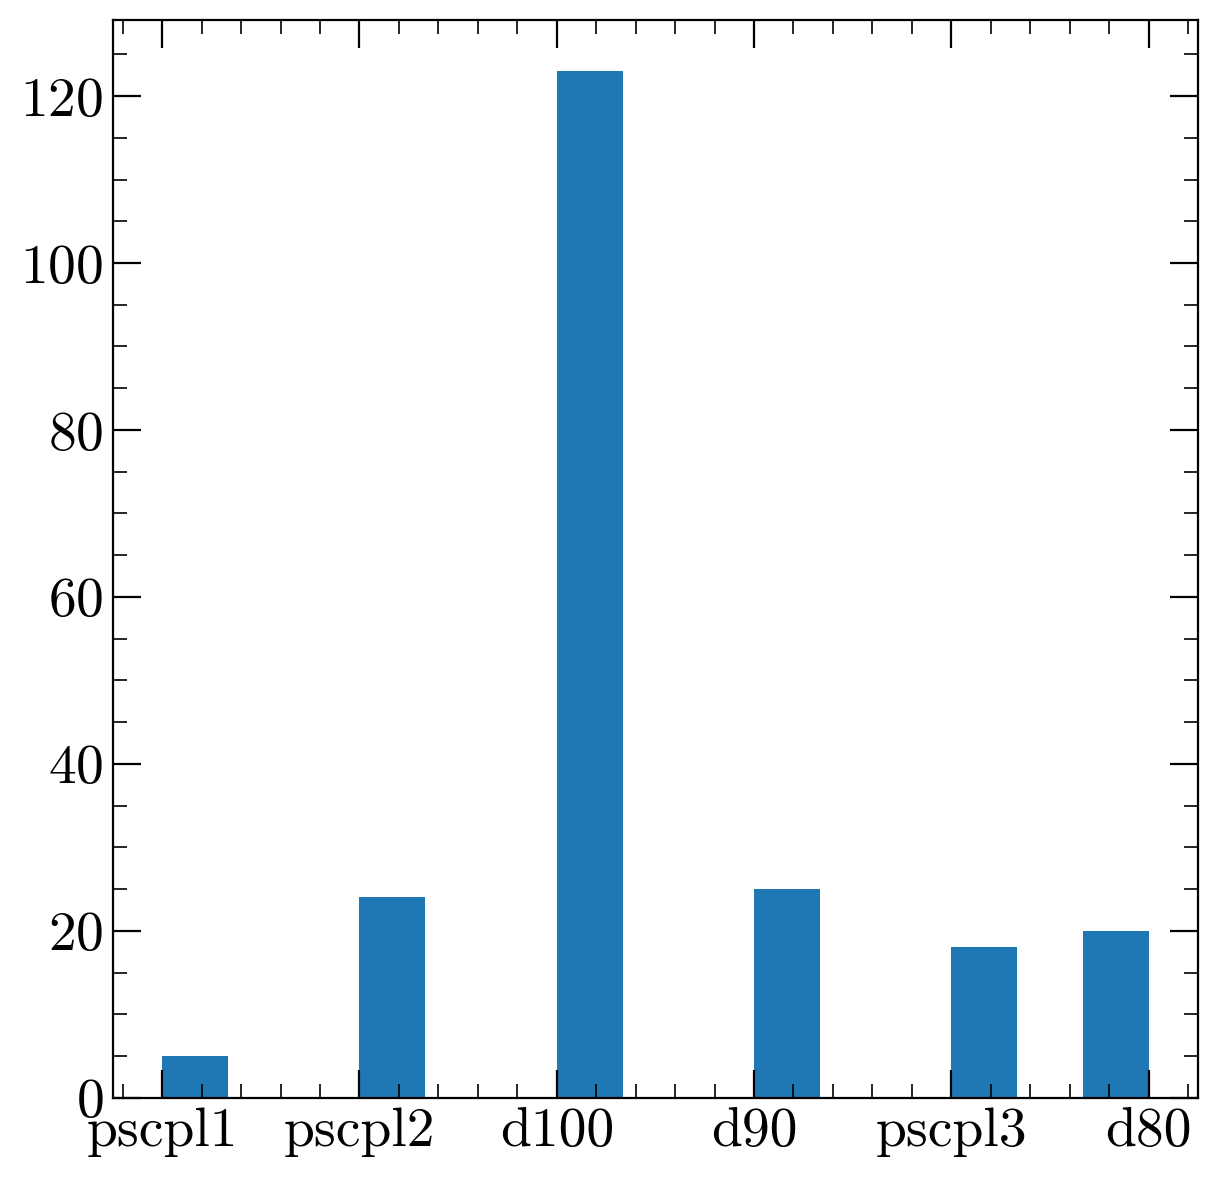

In [354]:
plt.hist(mage[cl1]['tdb_selection']);

In [355]:
def pltcomp(x):
    plt.errorbar(mage_nogal[x][cl], mage[x][cl], 
                 xerr = mage_nogal[x + '_err'][cl], yerr = mage[x + '_err'][cl],
                color = 'k', markersize = 8, marker = 'o',
                linestyle = 'none')
    
    xlim, ylim = plt.gca().get_xlim(), plt.gca().get_ylim()
    
    plt.plot(xlim, xlim, color = 'C3')
    
    plt.xlim(xlim)
    plt.ylim(xlim)
    
    plt.xlabel(x + ' OLD')
    plt.ylabel(x + ' NEW')

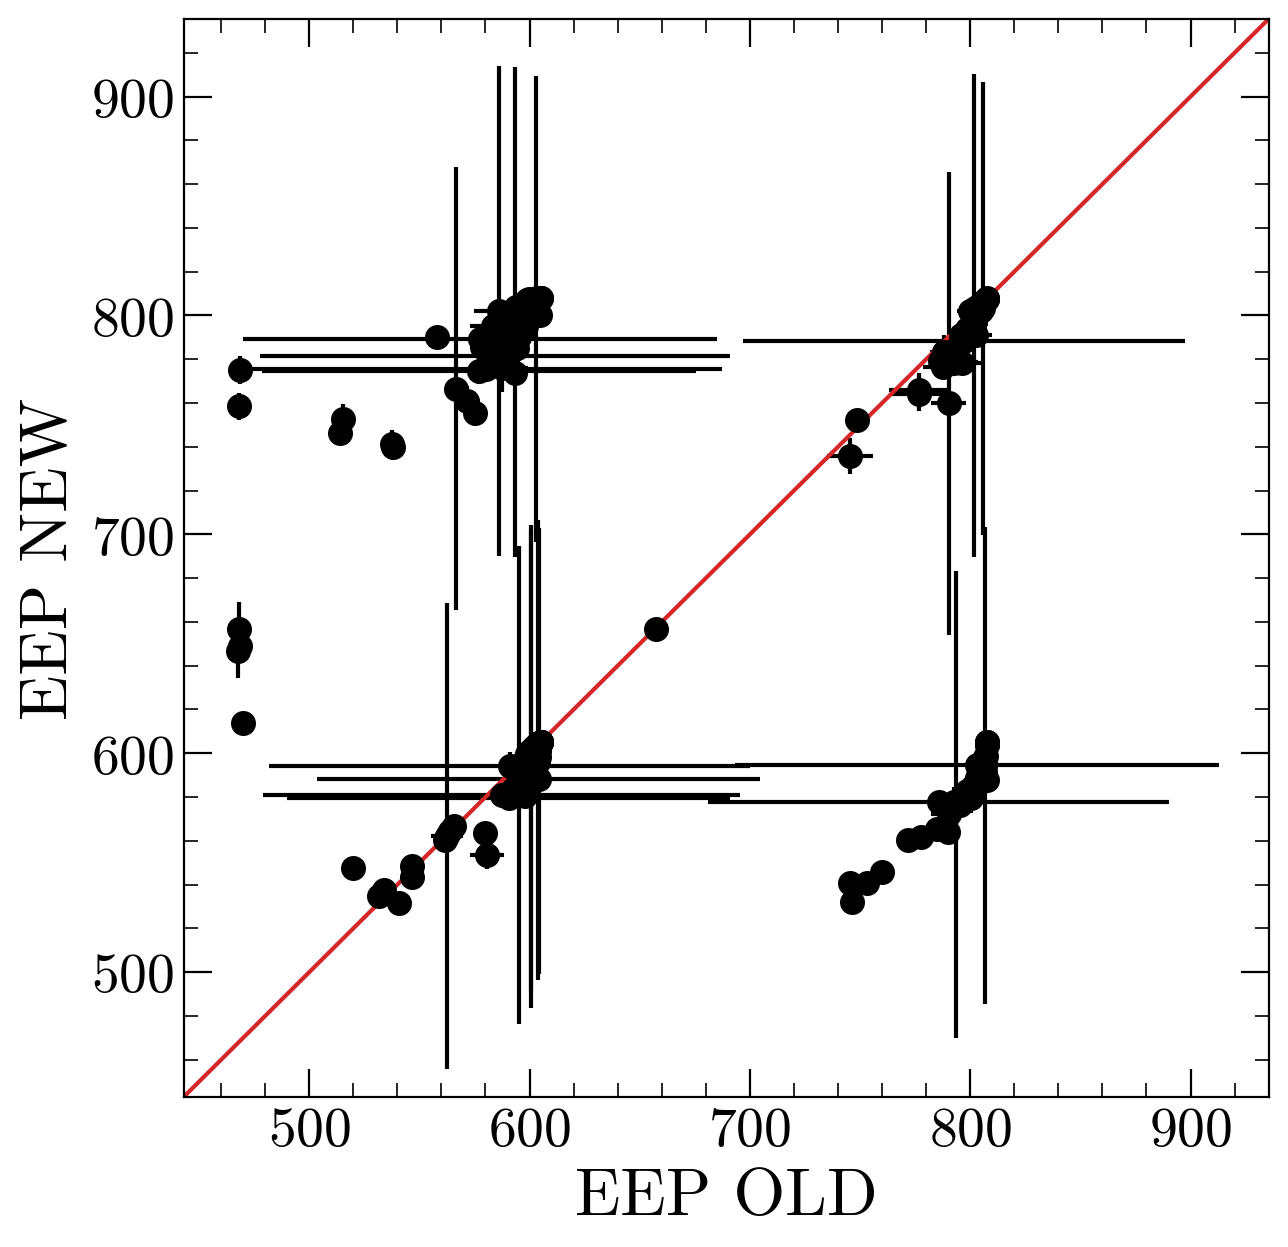

In [356]:
pltcomp('EEP')

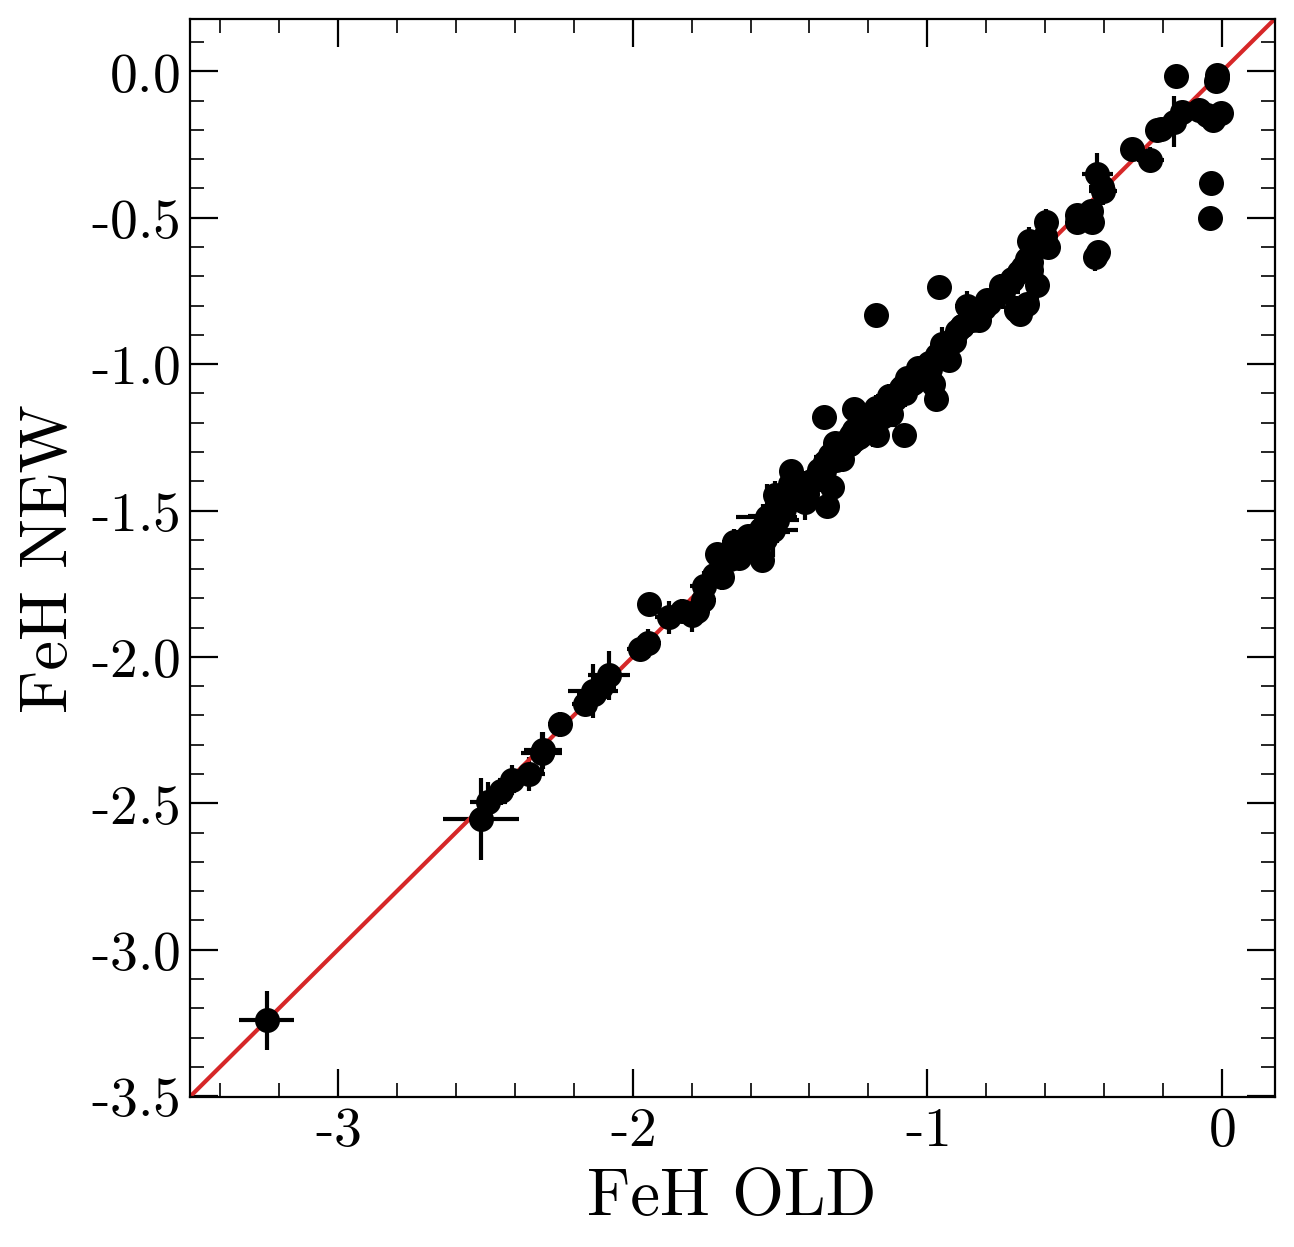

In [357]:
pltcomp('FeH')

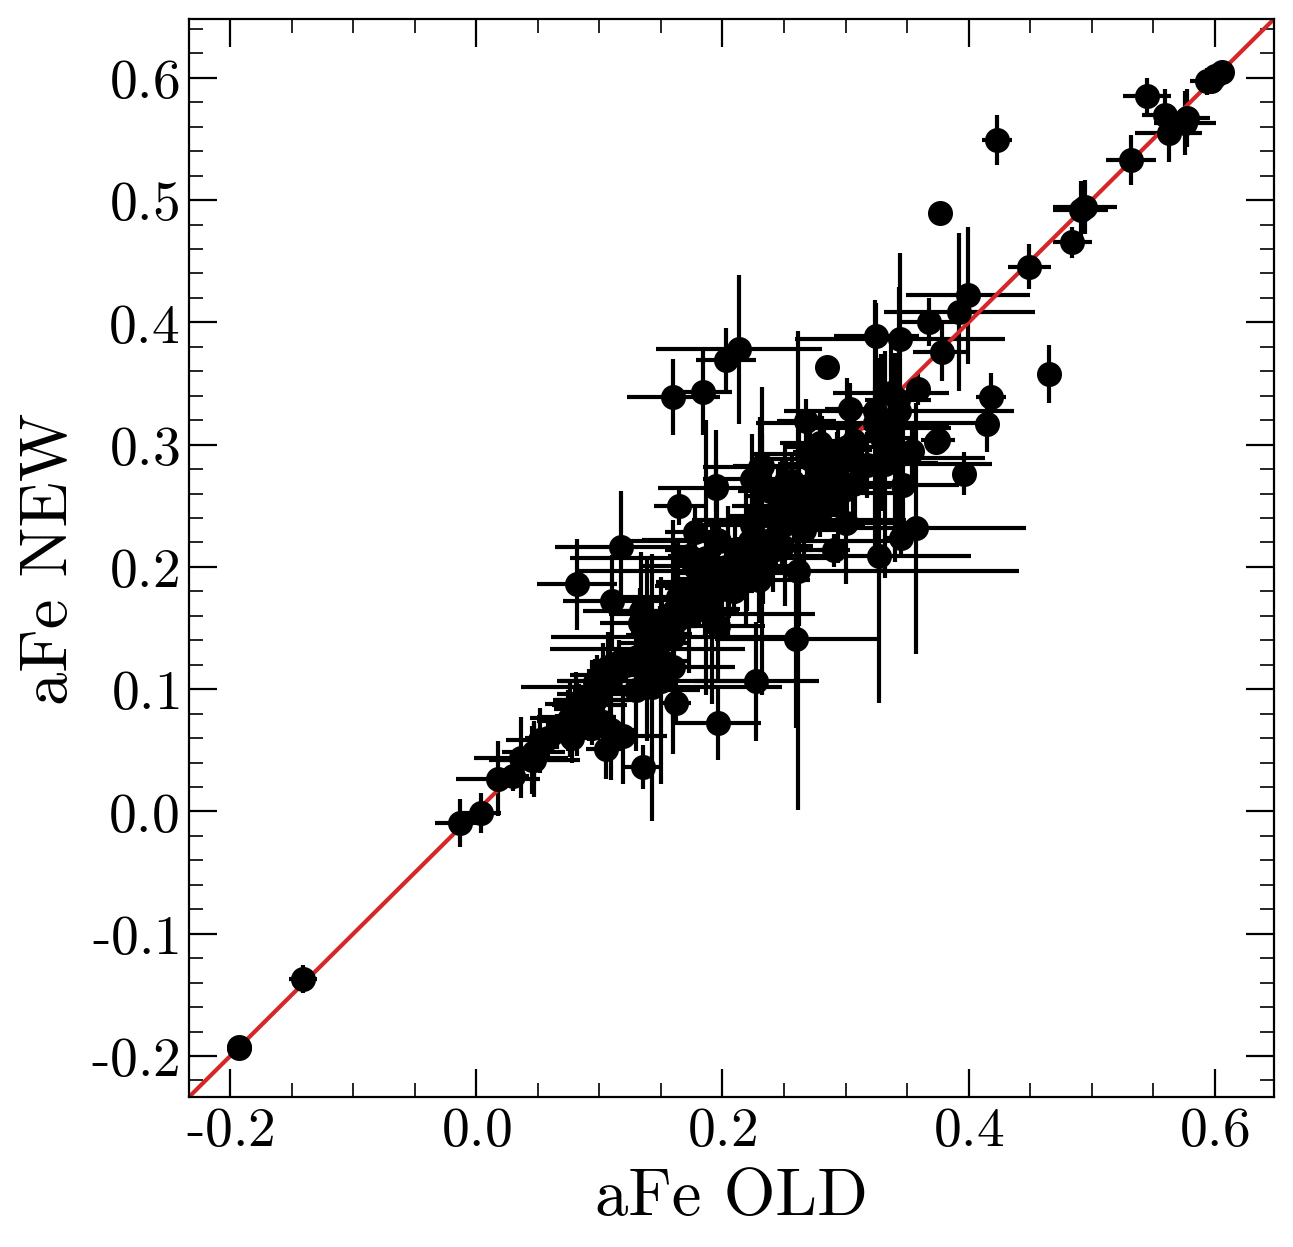

In [358]:
pltcomp('aFe')

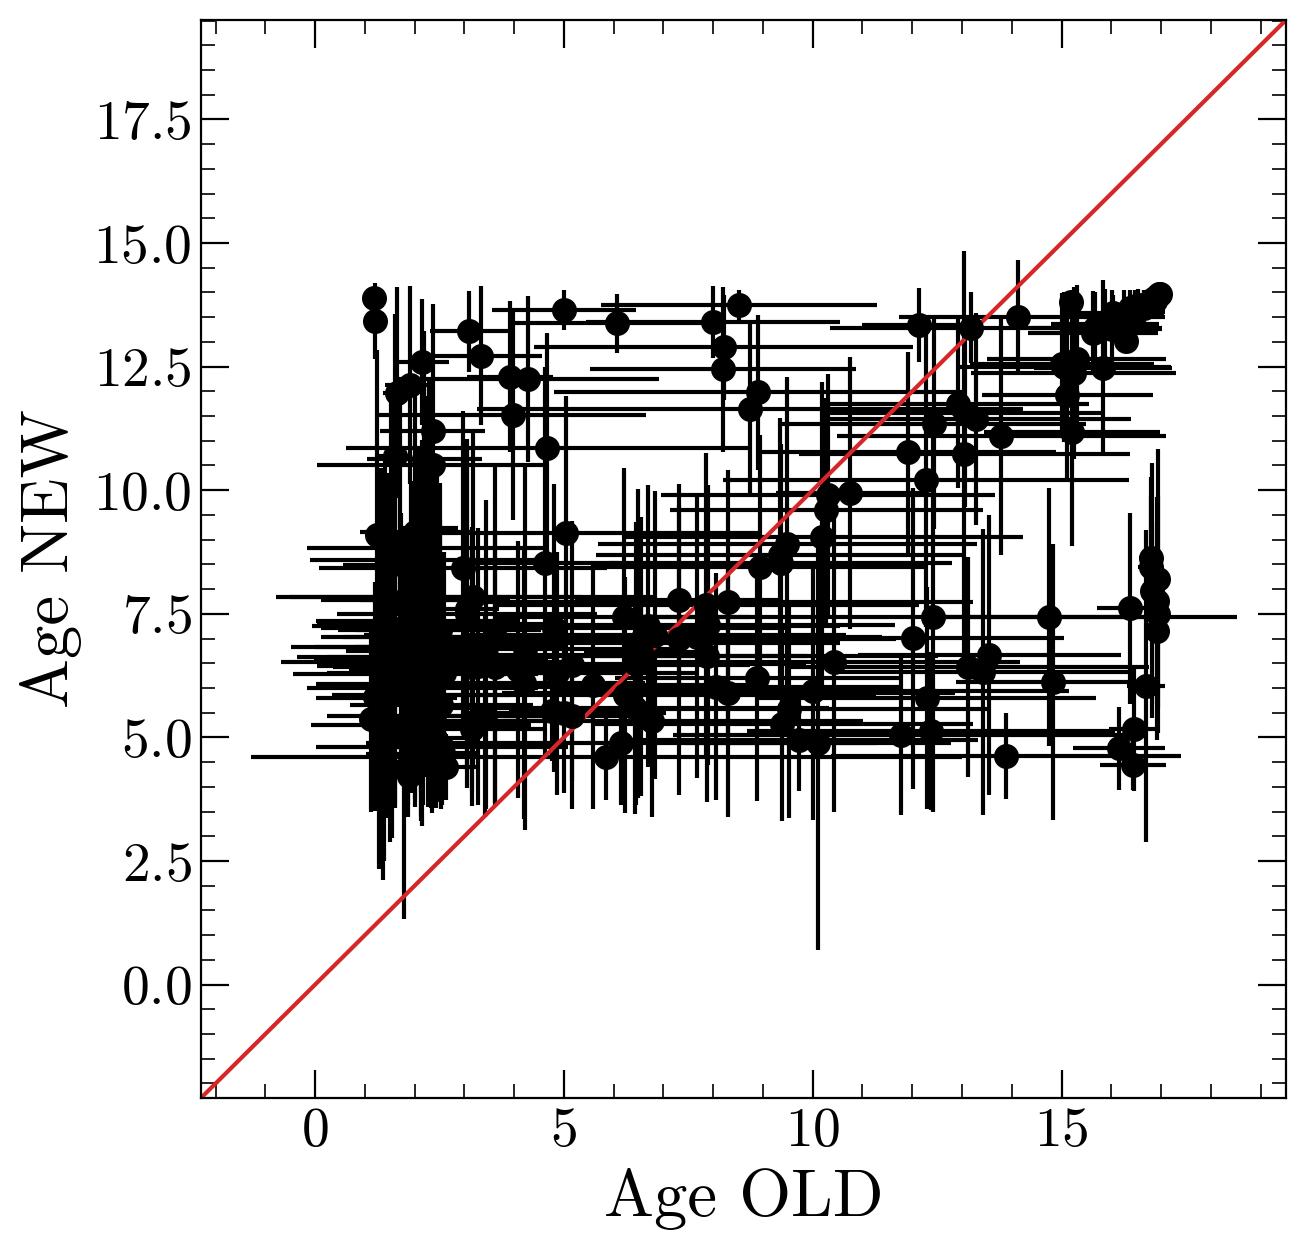

In [359]:
pltcomp('Age')

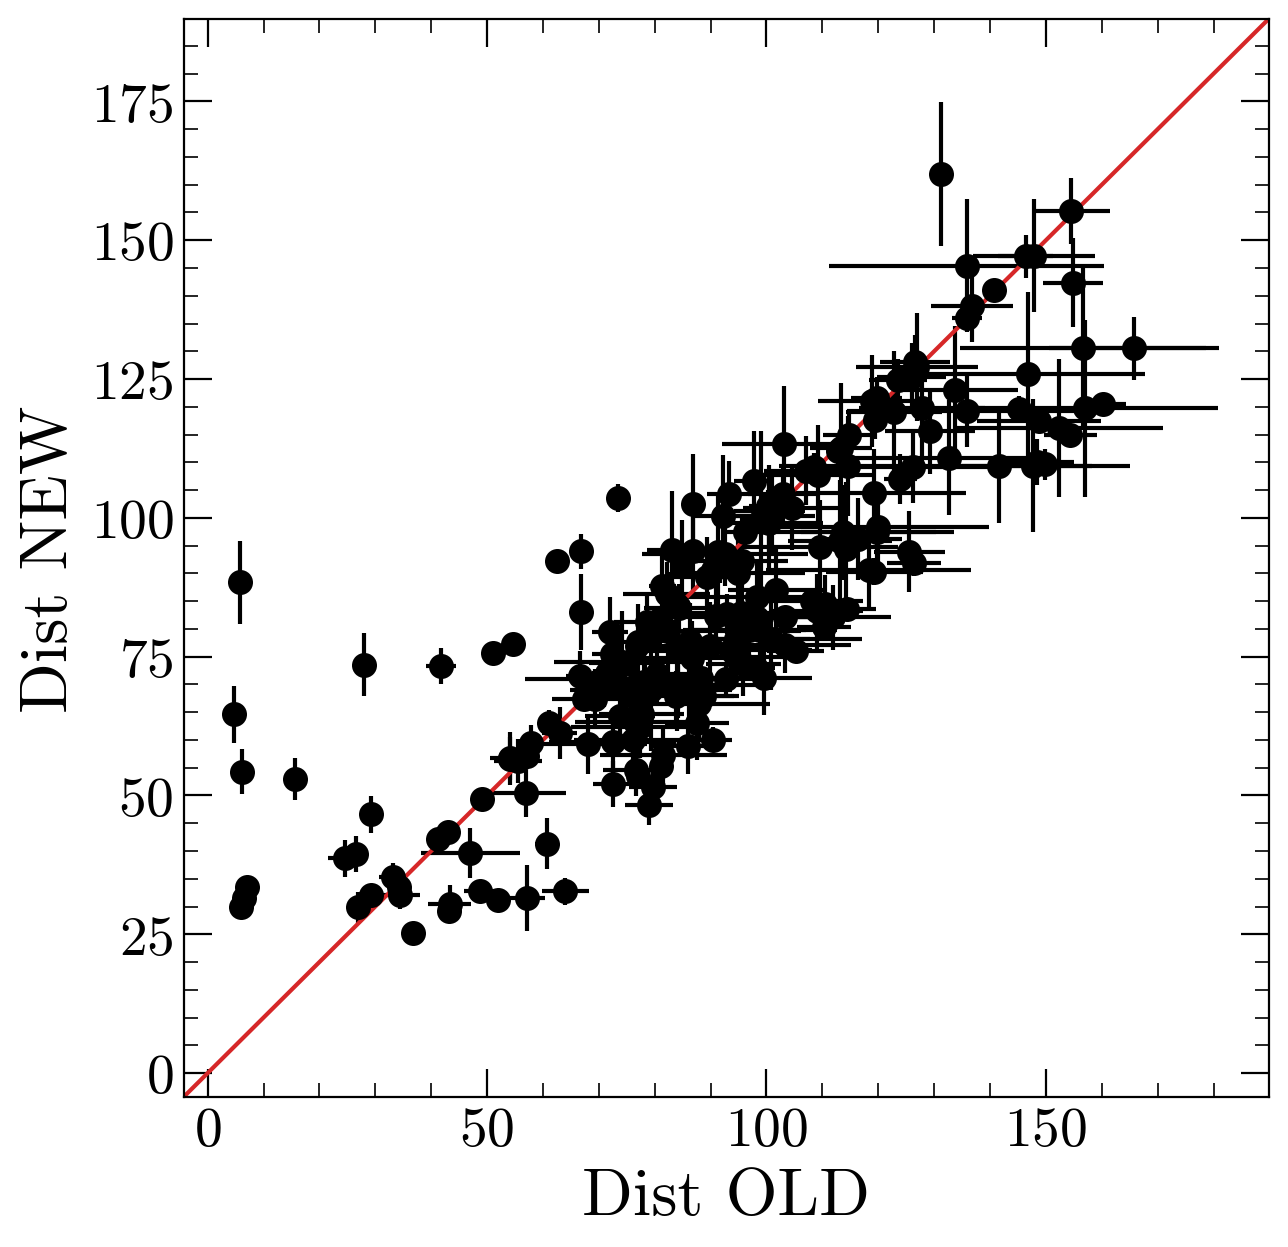

In [360]:
pltcomp('Dist')

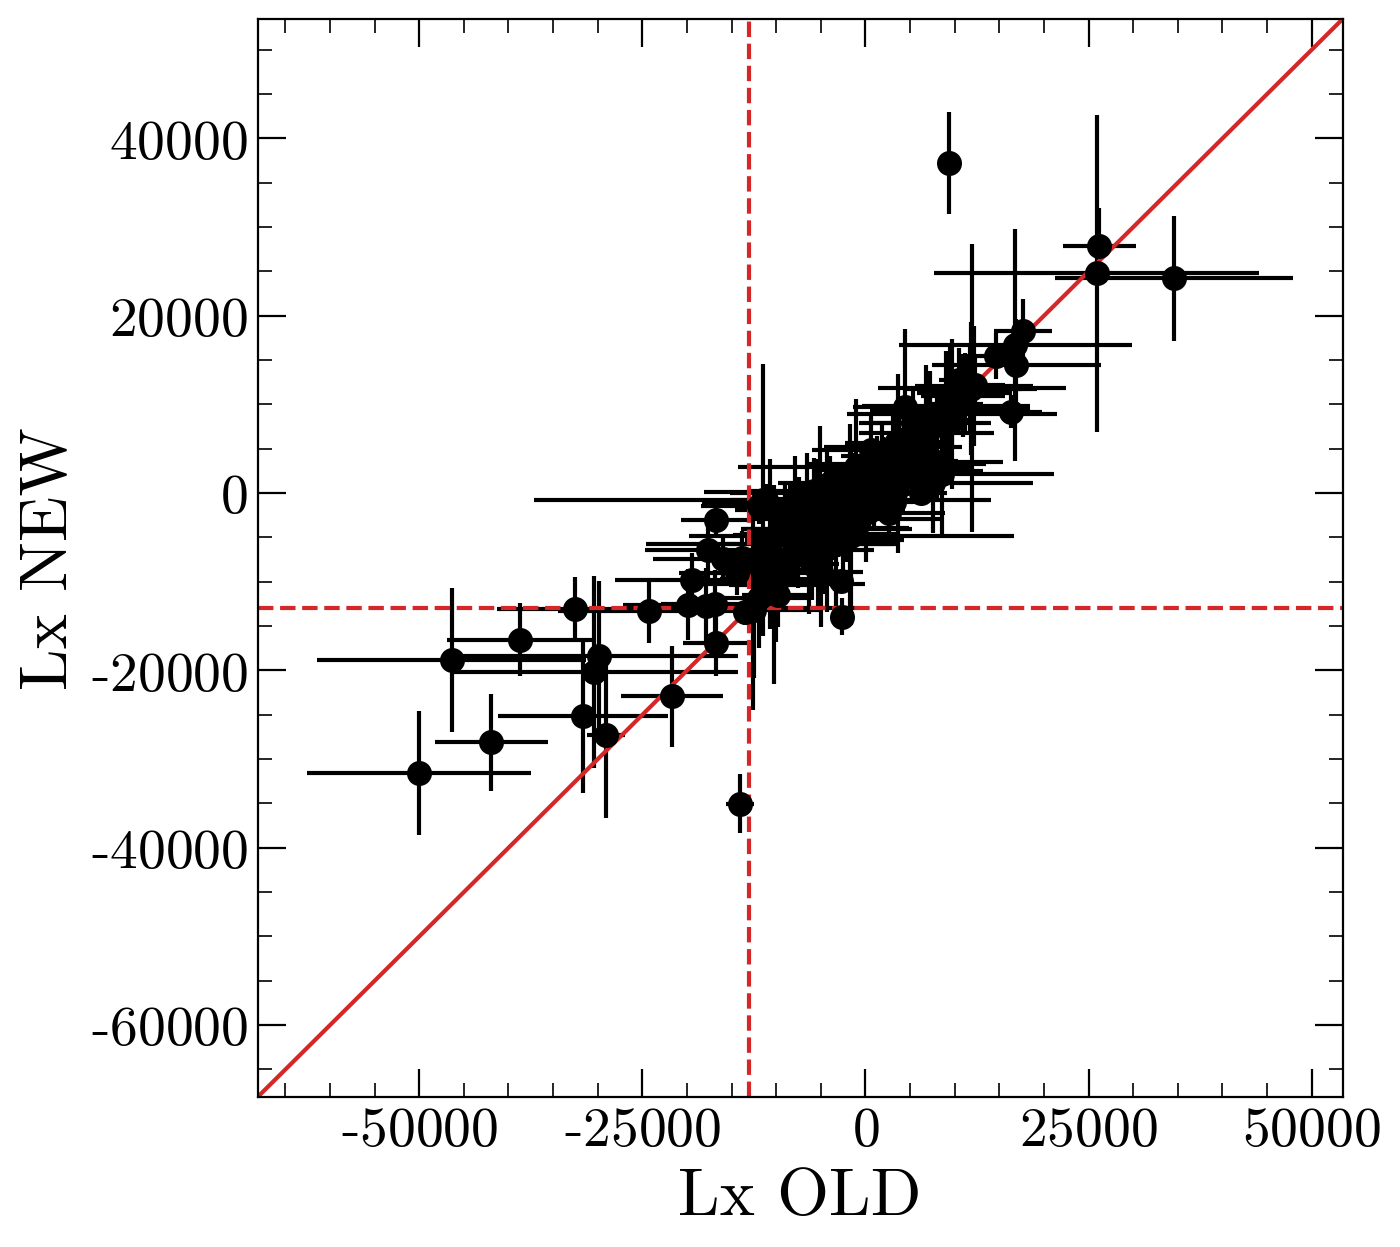

In [361]:
pltcomp('Lx')
plt.axvline(-13000, color = 'C3', ls = '--')
plt.axhline(-13000, color = 'C3', ls = '--')

Text(0, 0.5, 'PDF')

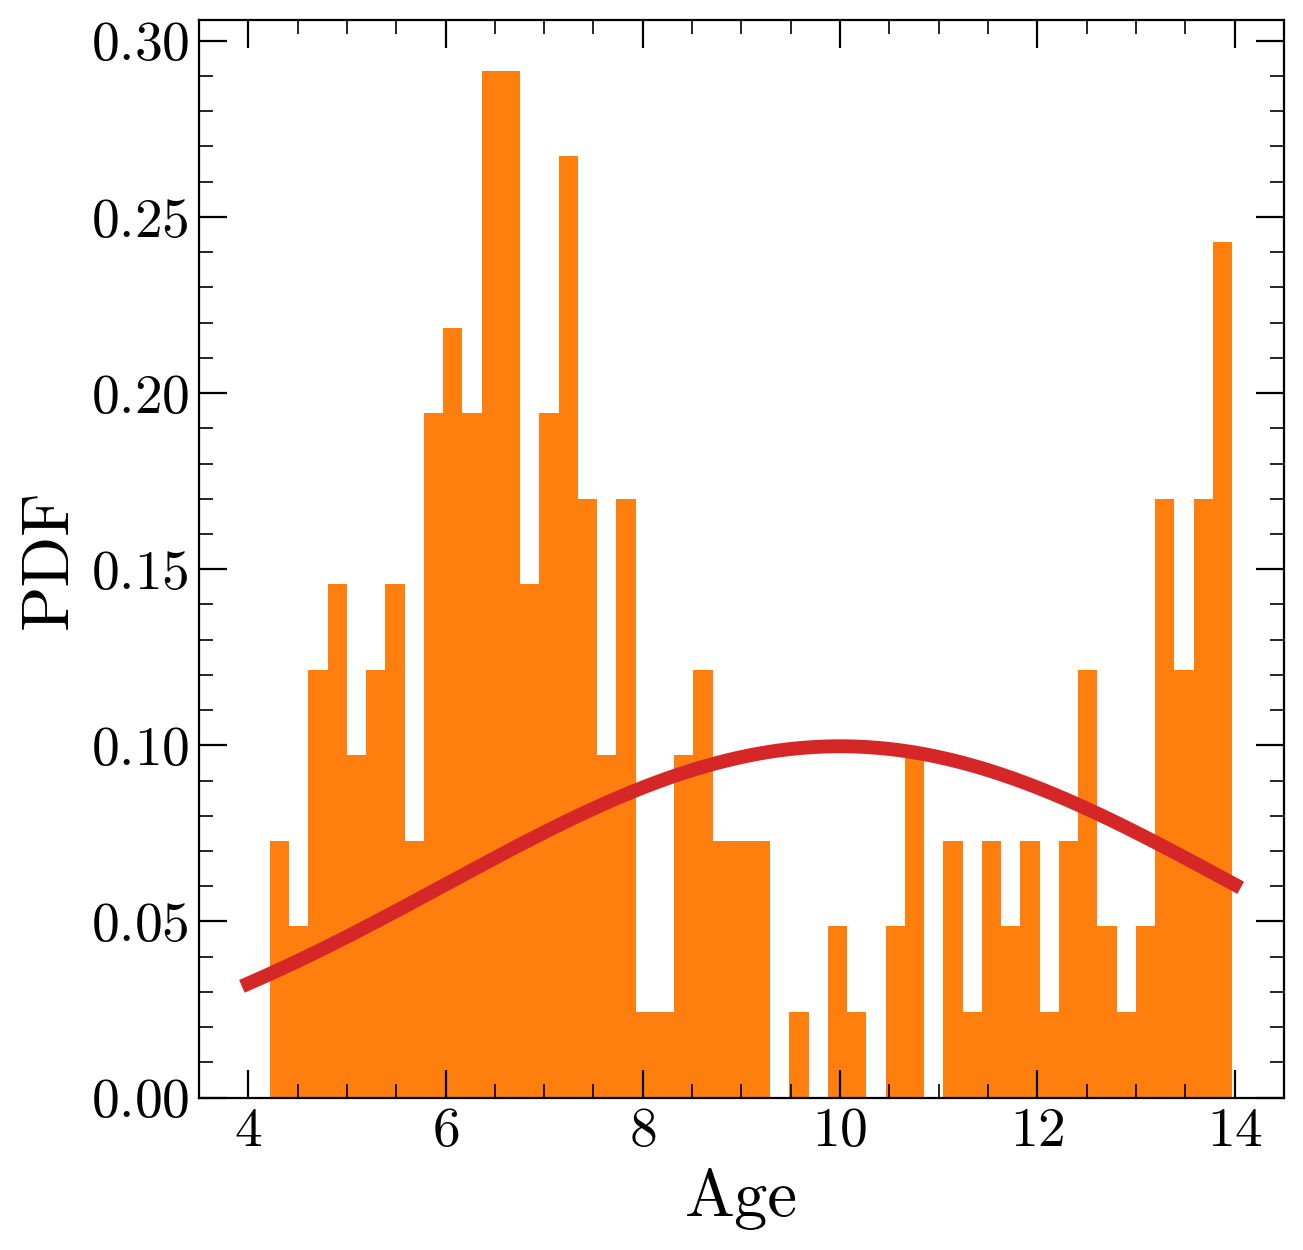

In [362]:
plt.hist(mage['Age'][cl], bins = 50, density = True, color = 'C1');

ages = np.linspace(4, 14, 1000)

mu = 10
sigma = 4
plt.plot(ages, stats.norm.pdf(ages, loc = mu, scale = sigma), color = 'C3', lw = 5)

plt.xlabel('Age')
plt.ylabel('PDF')

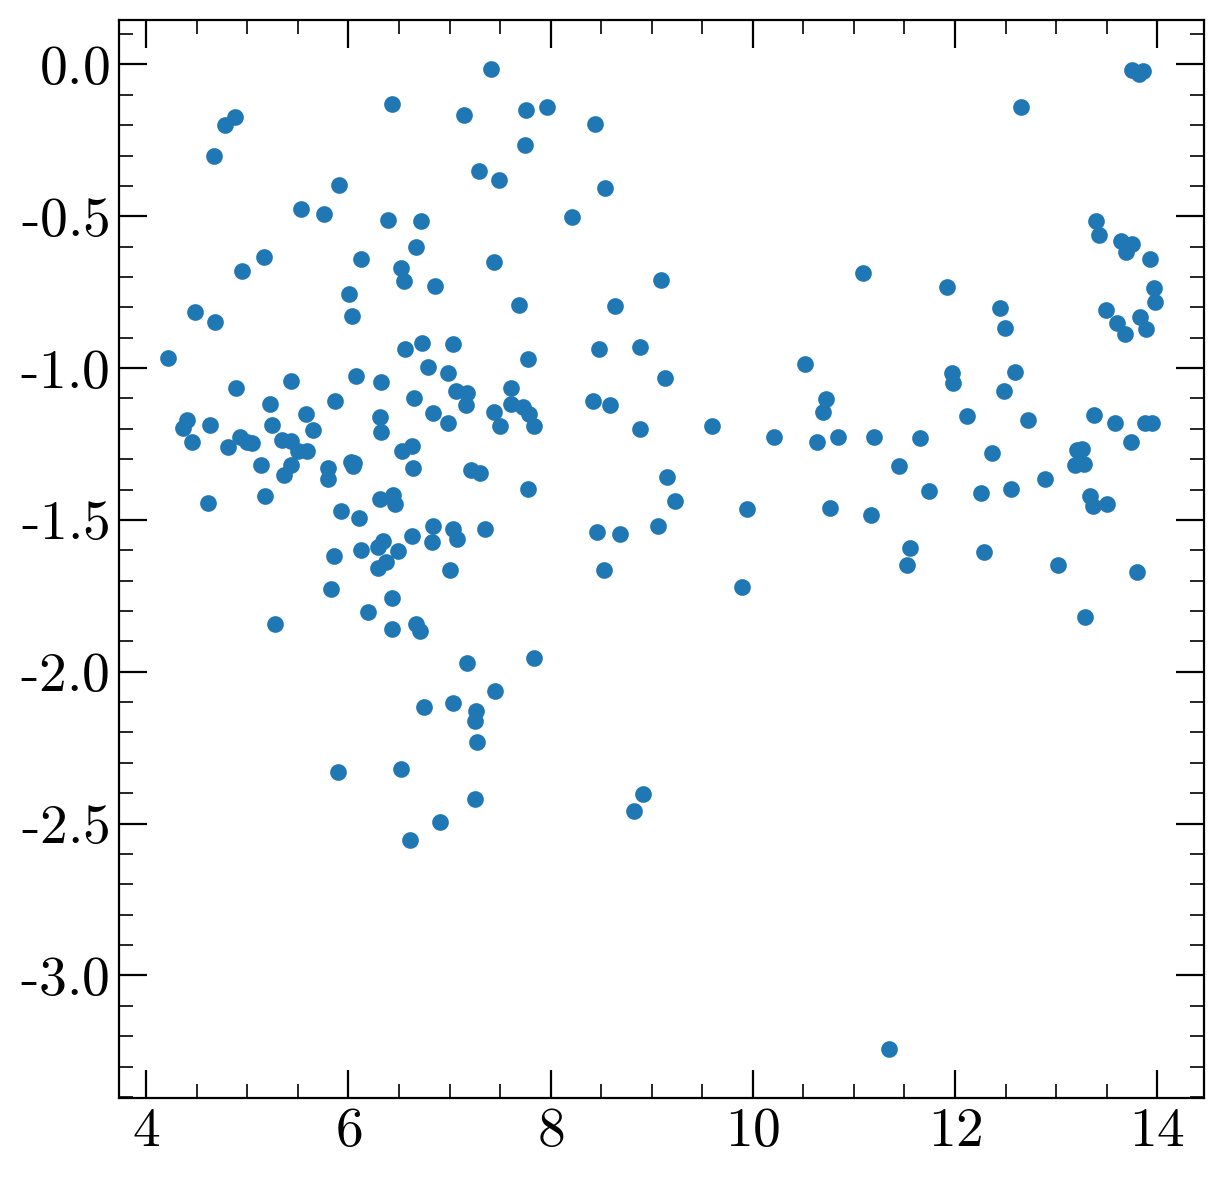

In [363]:
plt.scatter(mage['Age'][cl], mage['FeH'][cl])

Text(0, 0.5, 'Dist')

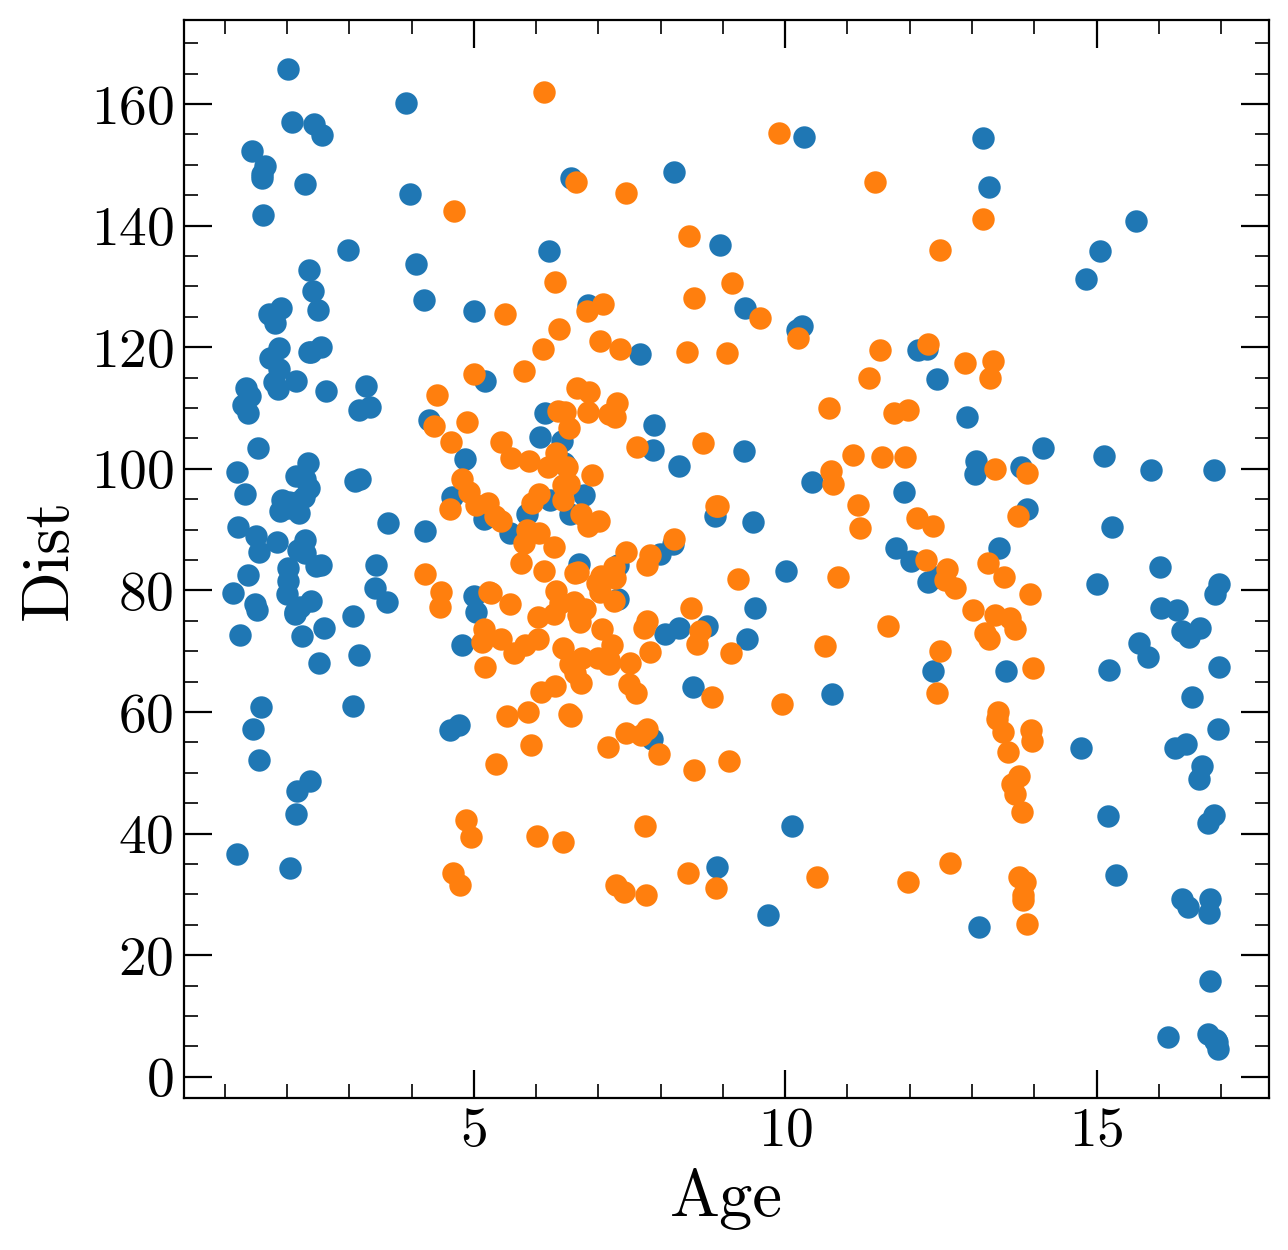

In [364]:
plt.scatter(mage_nogal['Age'][cl], mage_nogal['Dist'][cl], s = 50)
plt.scatter(mage['Age'][cl], mage['Dist'][cl], s = 50)

plt.xlabel('Age')
plt.ylabel('Dist')

Text(0, 0.5, 'logg')

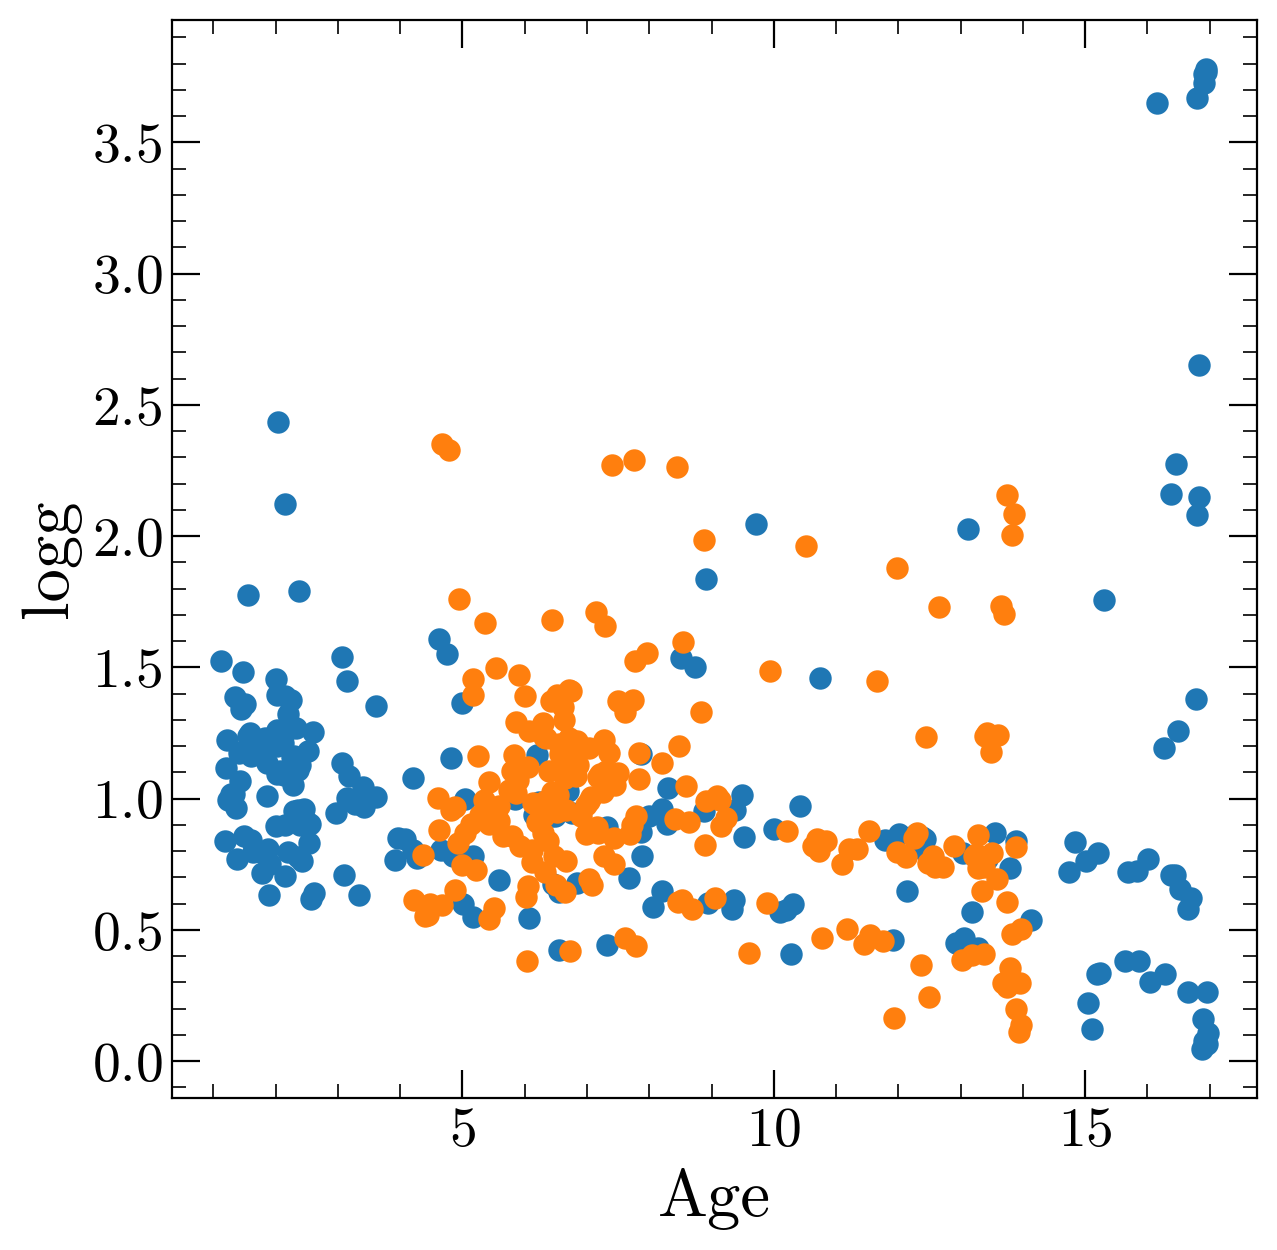

In [365]:
plt.scatter(mage_nogal['Age'][cl], mage_nogal['logg'][cl], s = 50)
plt.scatter(mage['Age'][cl], mage['logg'][cl], s = 50)

plt.xlabel('Age')
plt.ylabel('logg')

Text(0, 0.5, 'logg')

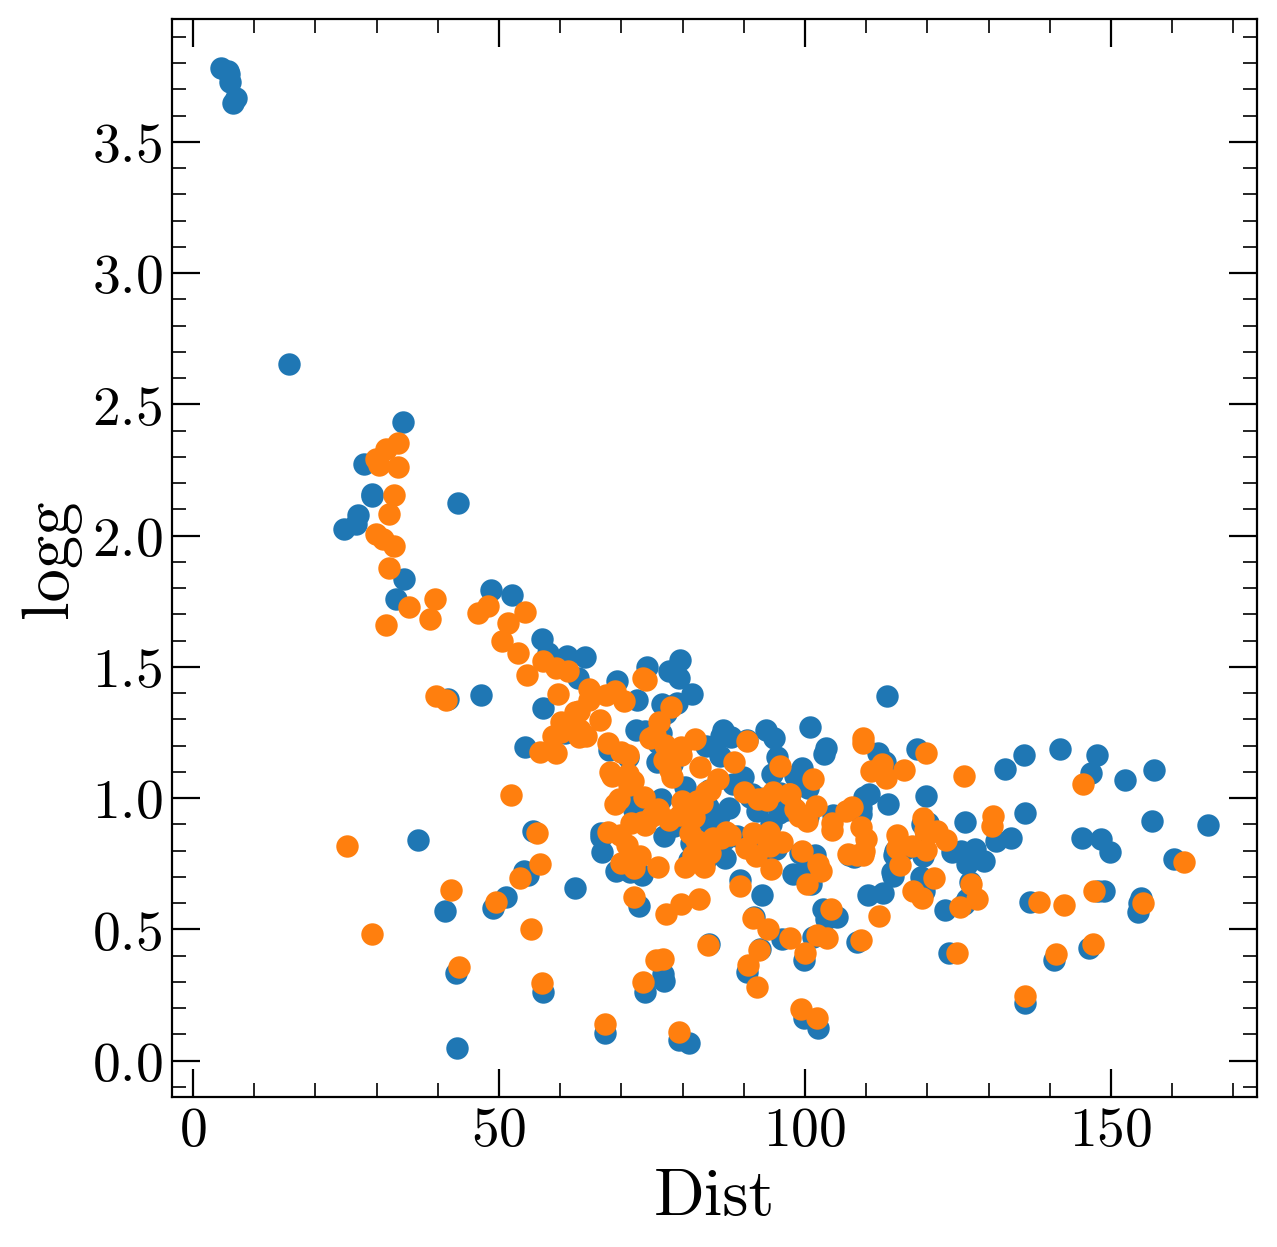

In [366]:
plt.scatter(mage_nogal['Dist'][cl], mage_nogal['logg'][cl], s = 50)
plt.scatter(mage['Dist'][cl], mage['logg'][cl], s = 50)

plt.xlabel('Dist')
plt.ylabel('logg')

Text(0, 0.5, 'logg')

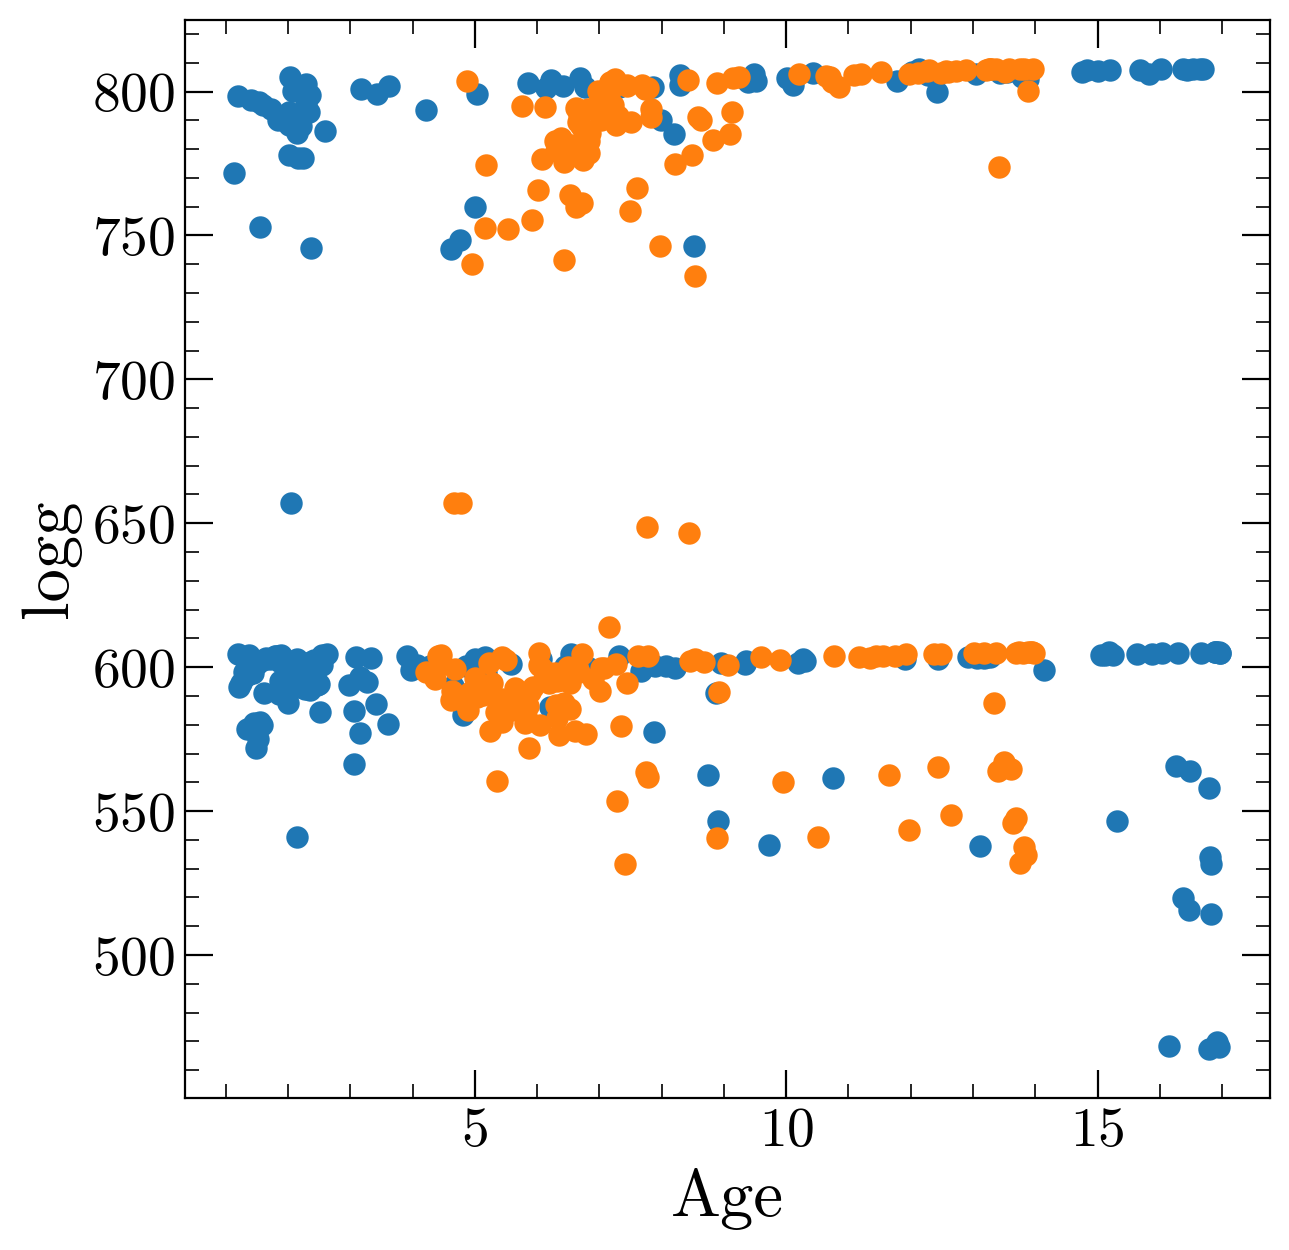

In [367]:
plt.scatter(mage_nogal['Age'][cl], mage_nogal['EEP'][cl], s = 50)
plt.scatter(mage['Age'][cl], mage['EEP'][cl], s = 50)

plt.xlabel('Age')
plt.ylabel('logg')

### MSS

In [368]:
mss = Table.read('/Users/vedantchandra/0_research/00_outerhalo/06_mage/01_plume/txt/mss.fits')

In [369]:
msel = np.isin(mage['name'], mss['name'])

In [370]:
def pltcomp(x, y):
    plt.scatter(mage[msel][x], mage[msel][y], s = 150, edgecolor = 'k', color = 'C1',
               label = lab2)
    plt.scatter(mage_nogal[msel][x], mage_nogal[msel][y], s = 150, edgecolor = 'k', color = 'C0',
               label = lab1)
    
    for ii in range(len(mss)):
        plt.plot([mage[msel][x], mage_nogal[msel][x]], [mage[msel][y], mage_nogal[msel][y]],
                color = 'k', zorder = 0)
        
    plt.xlabel(x)
    plt.ylabel(y)

Text(0.5, 1.0, 'MSS')

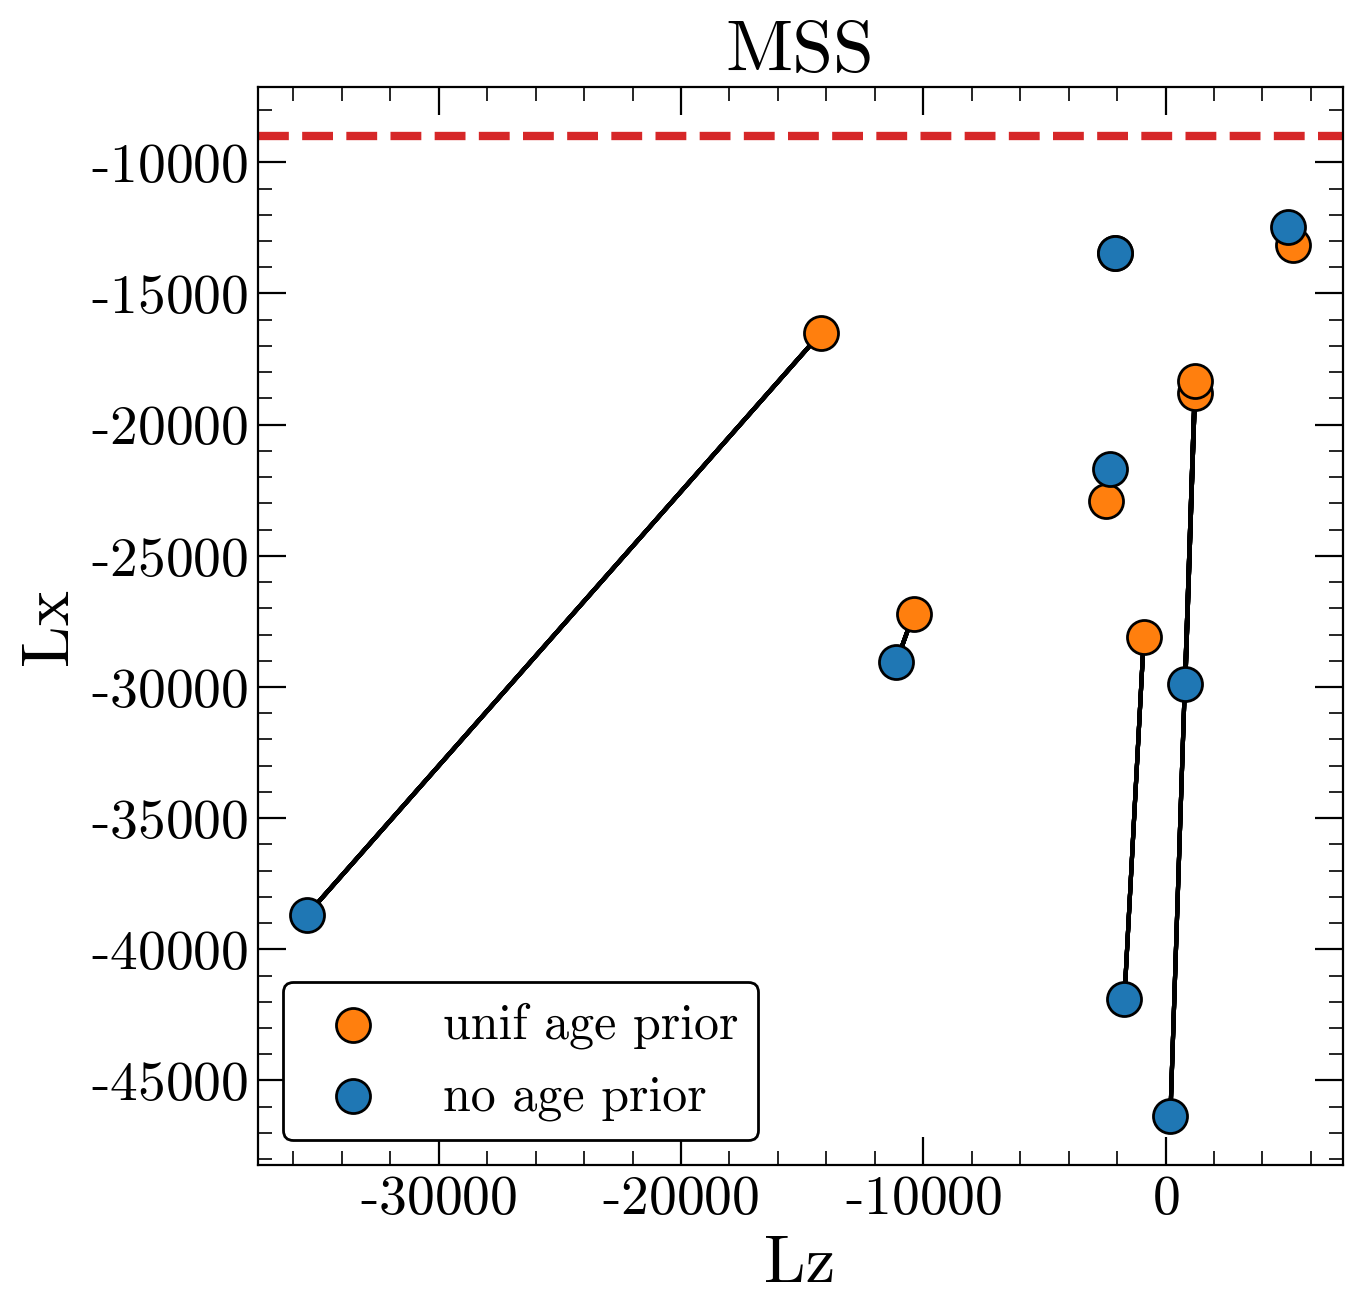

In [371]:
pltcomp('Lz', 'Lx')
plt.axhline(-9000, color = 'C3', ls = '--', lw = 3)
plt.legend()
#plt.axhline(-9000, color = 'C1')
plt.title('MSS')

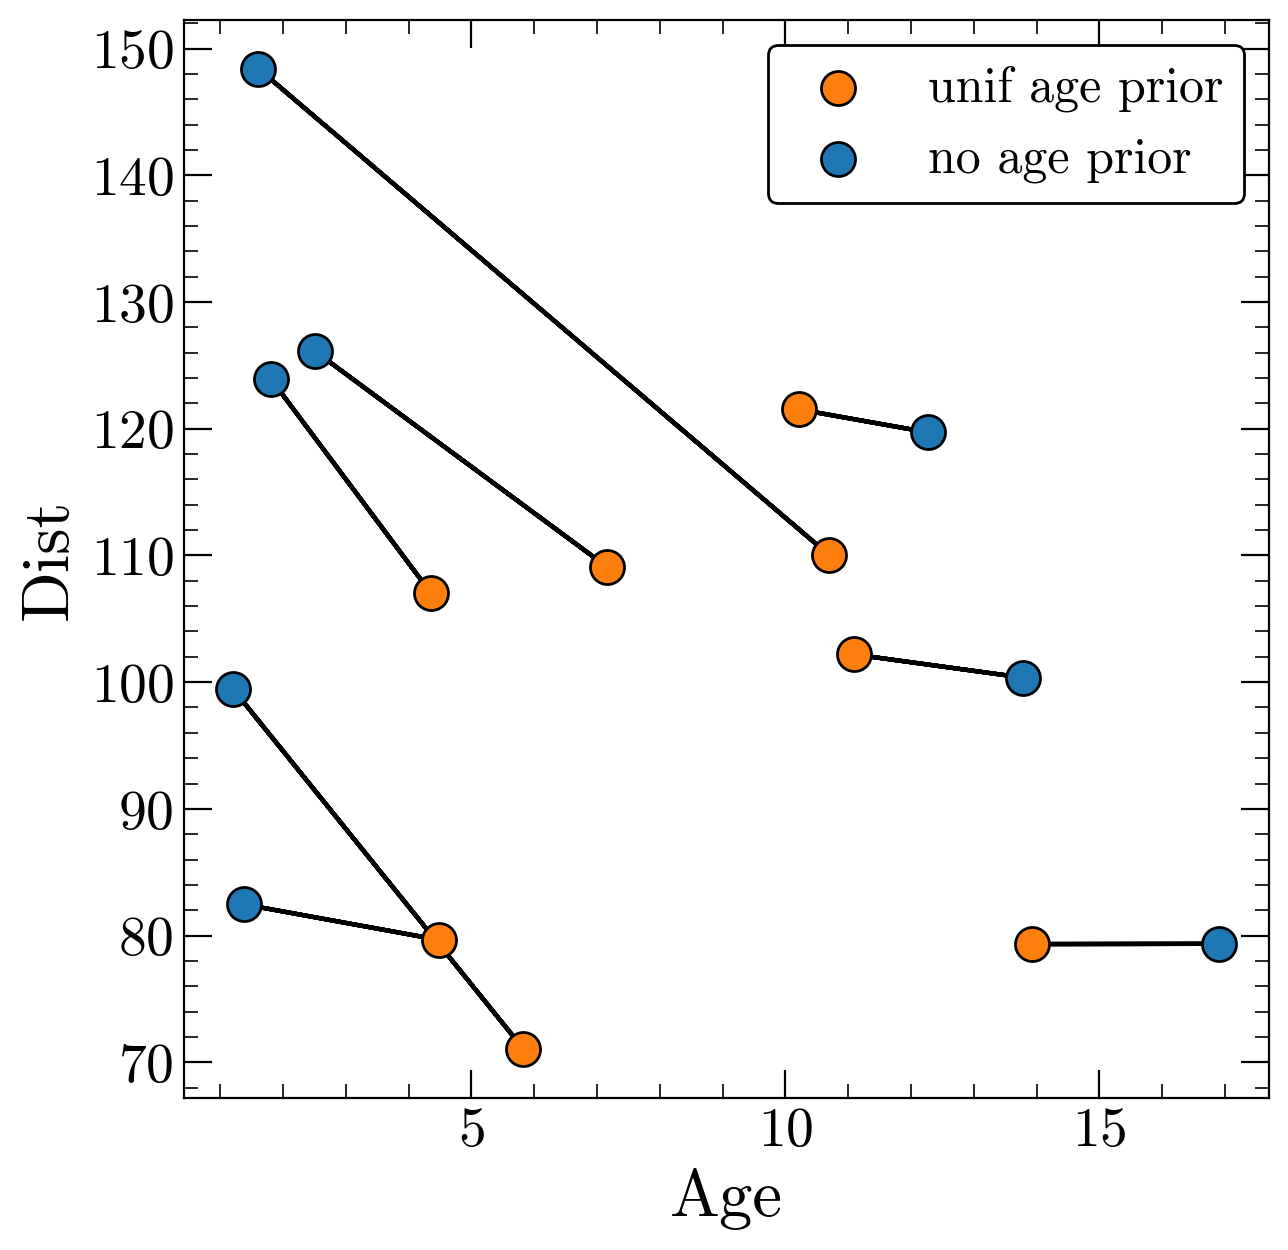

In [372]:
pltcomp('Age', 'Dist')
plt.legend()

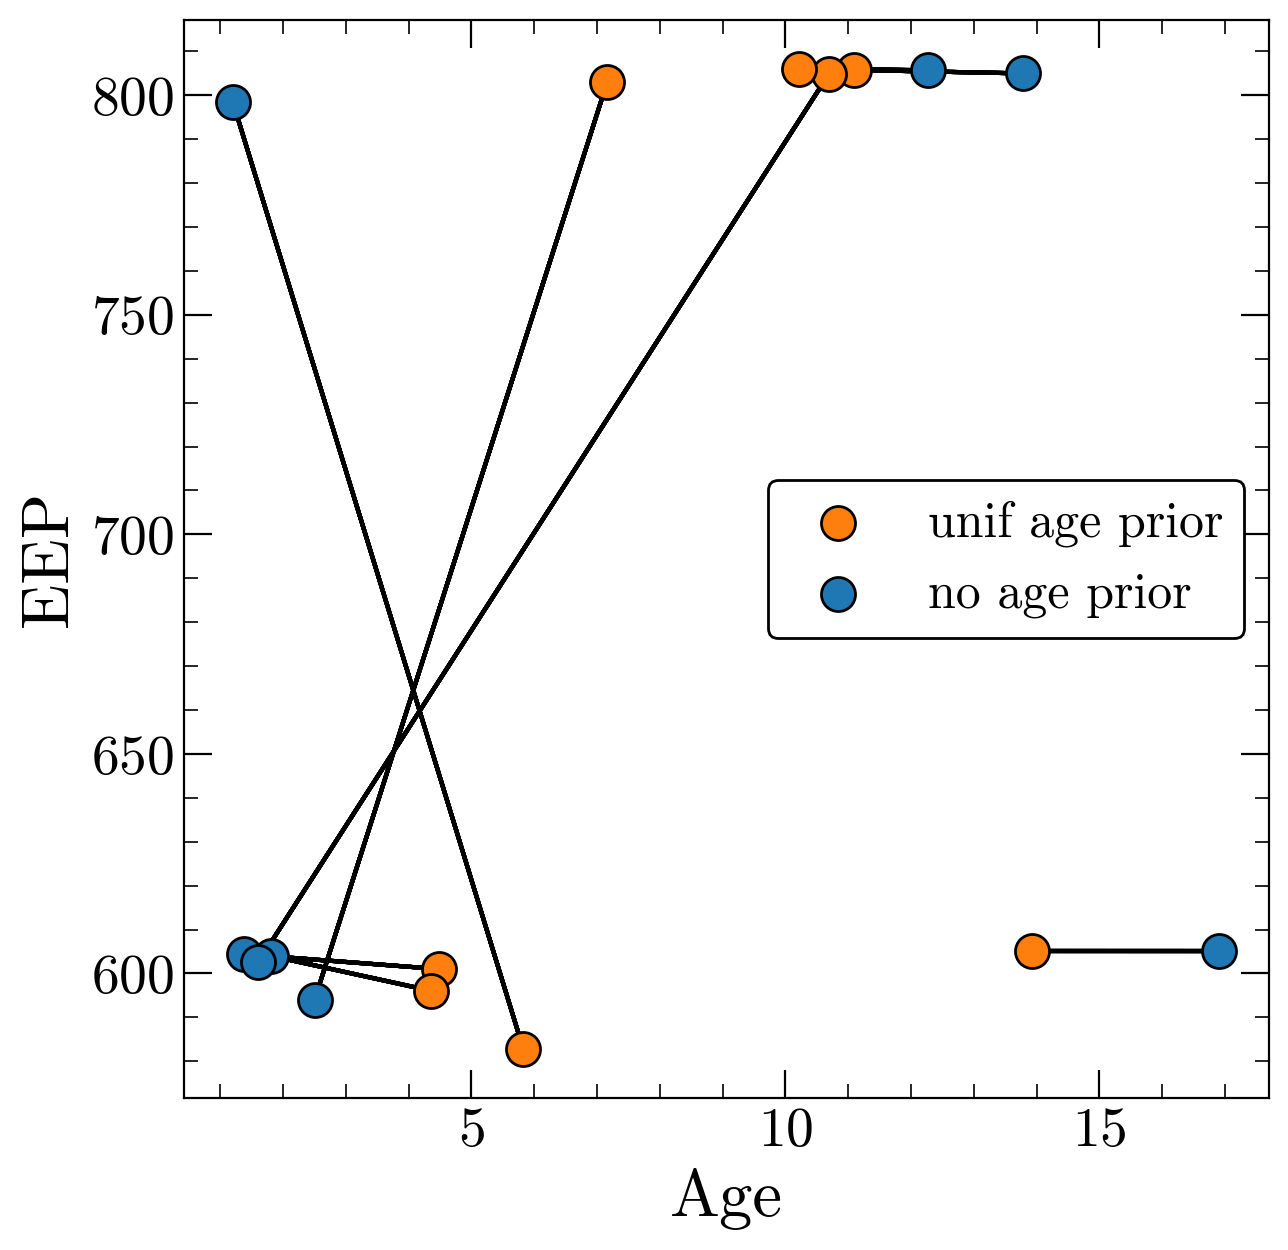

In [373]:
pltcomp('Age', 'EEP')
plt.legend()

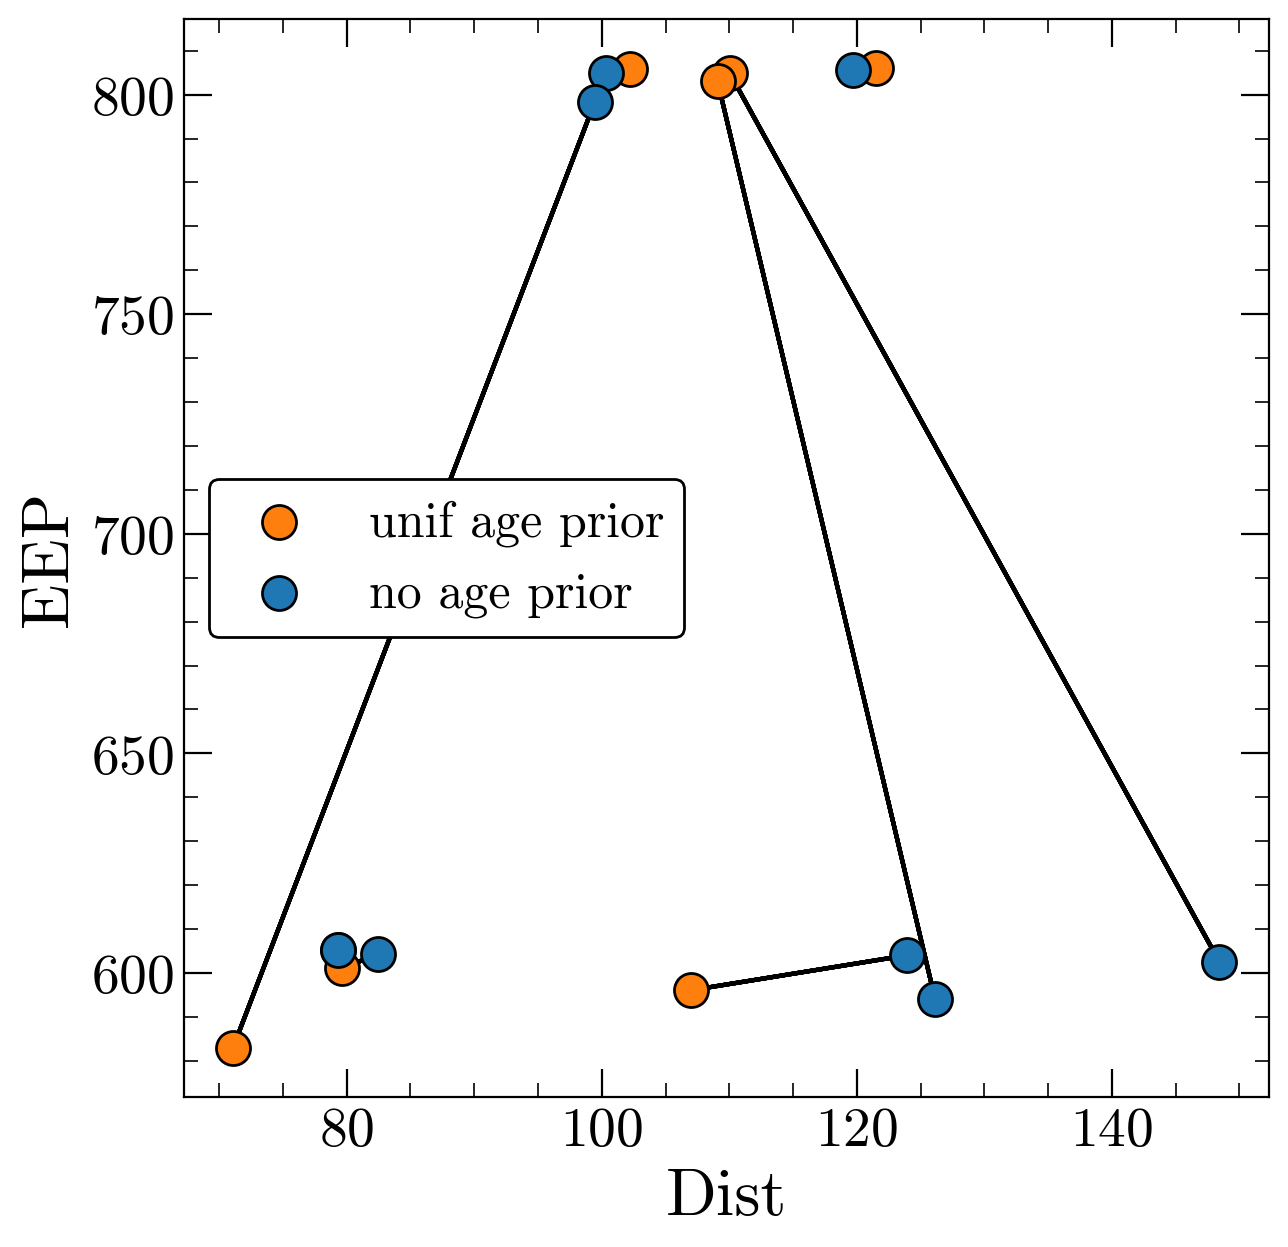

In [374]:
pltcomp('Dist', 'EEP')
plt.legend()

In [375]:
np.max(mss['EEP'])

806.849655671521

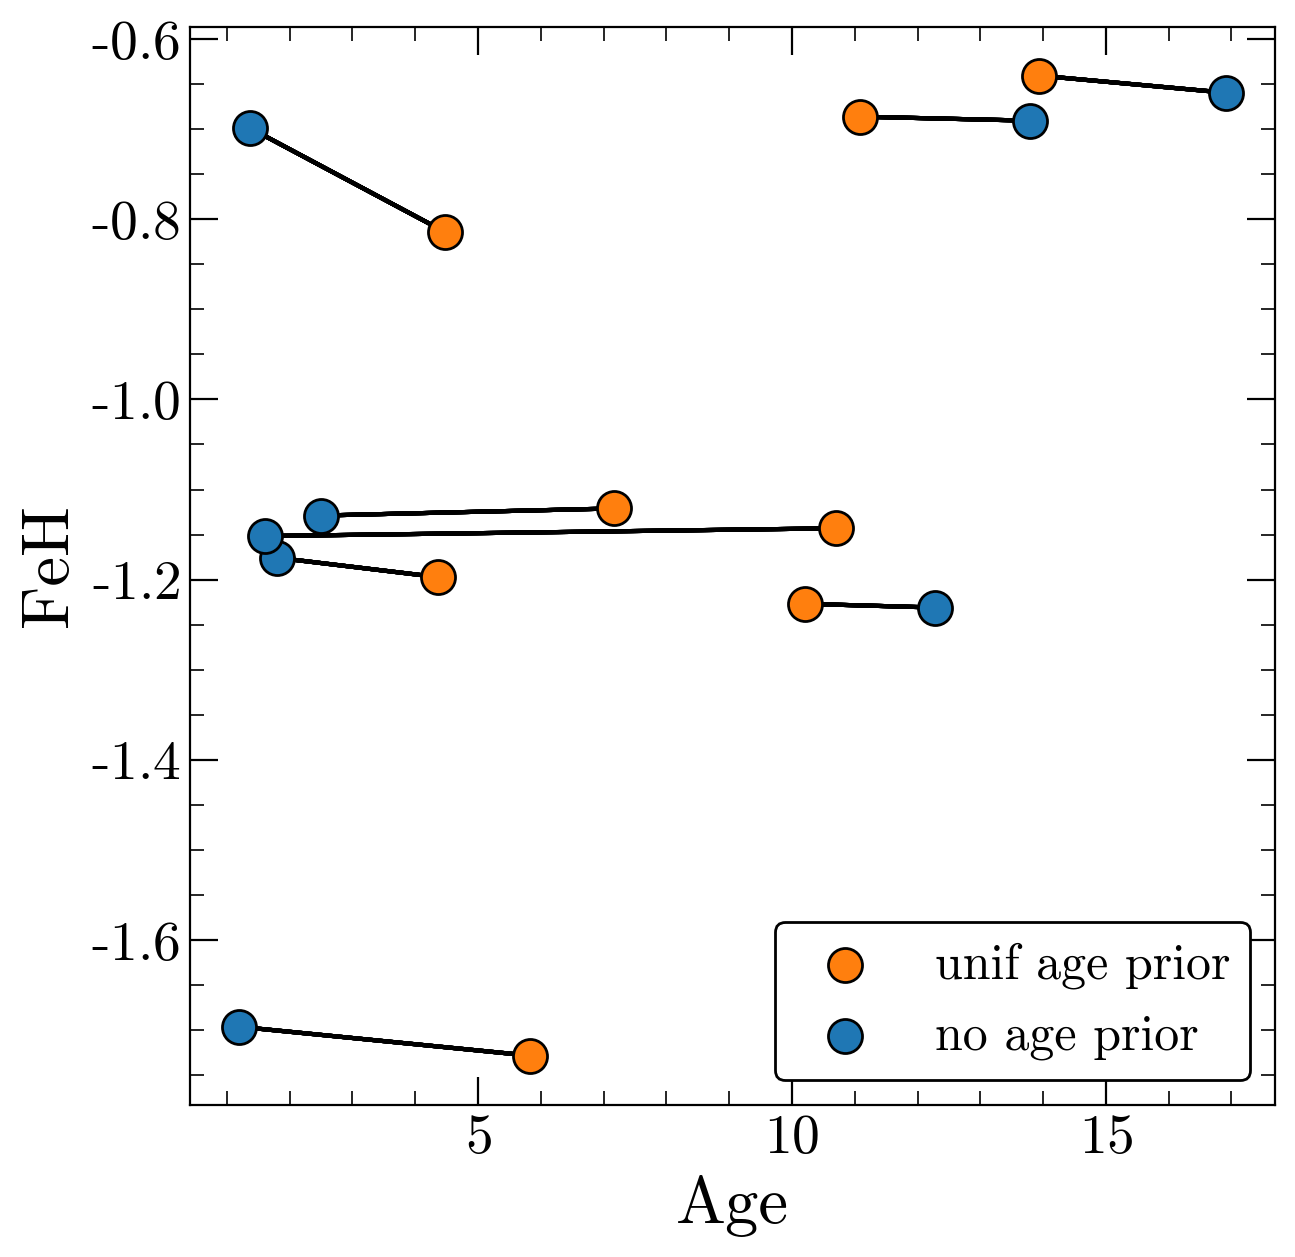

In [376]:
pltcomp('Age', 'FeH')
plt.legend()

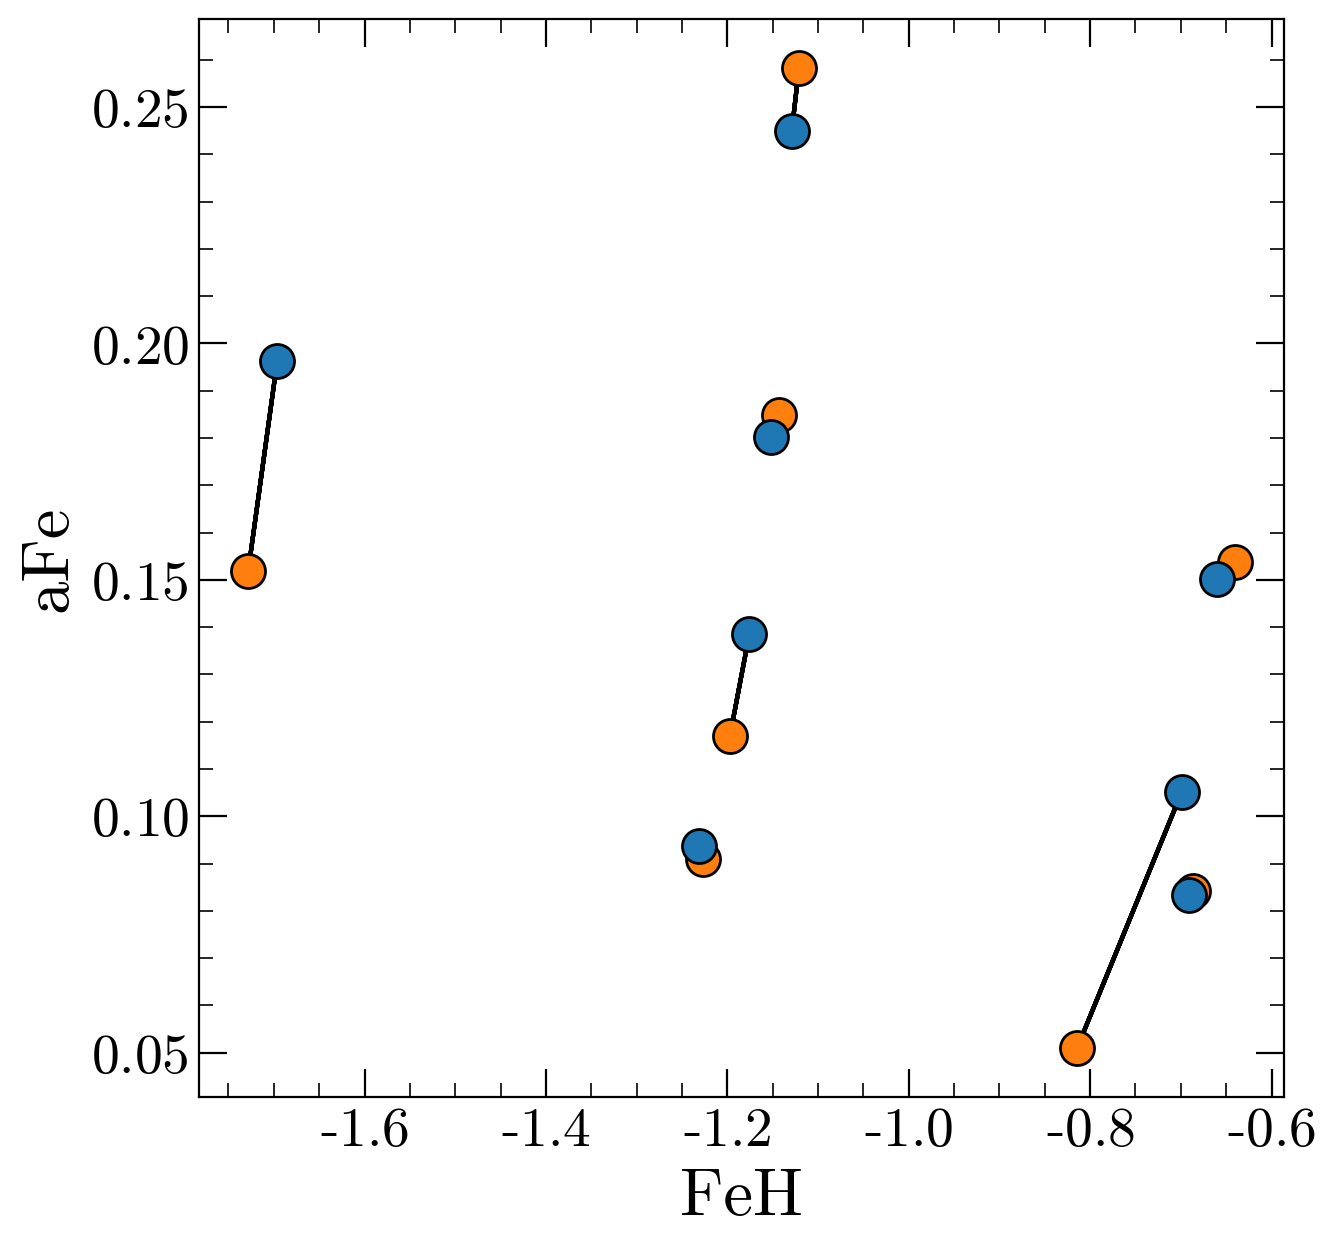

In [377]:
pltcomp('FeH', 'aFe')

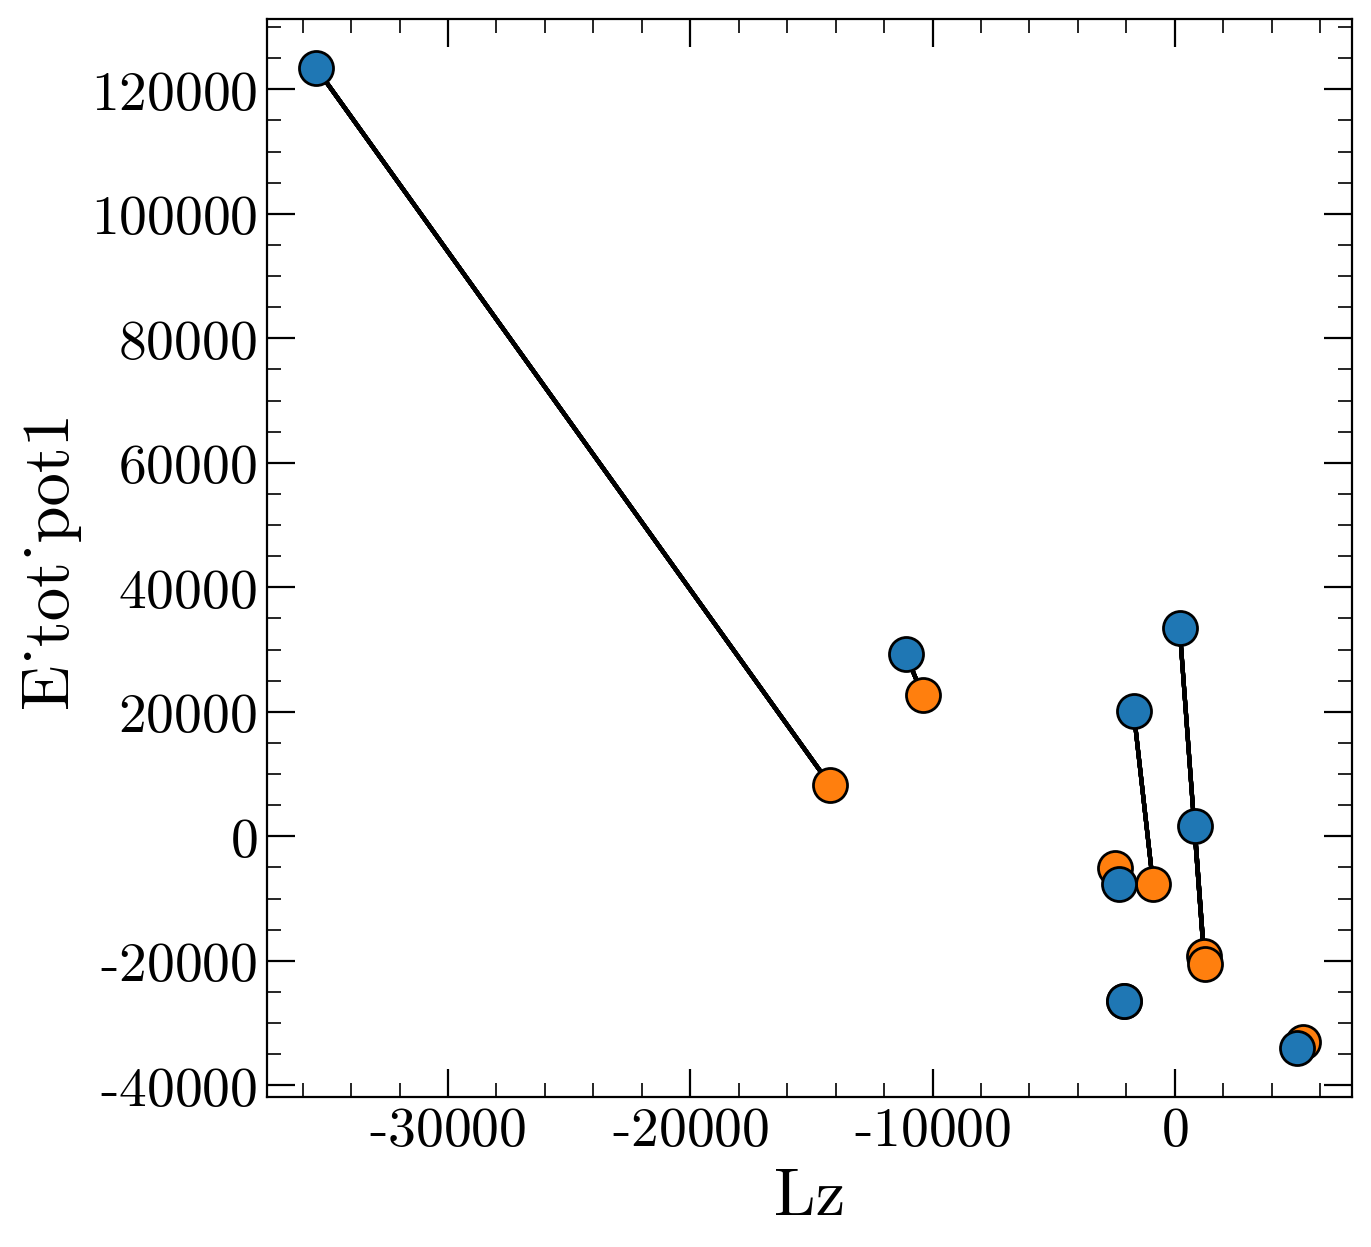

In [378]:
pltcomp('Lz', 'E_tot_pot1')

### Survey Progress

In [379]:
mage['year'] = Time(mage['mage_mjd'], format = 'mjd').jyear

In [380]:
last_time = Time(mage['mage_mjd'], format = 'mjd').iso[-1][:10]

In [381]:
title = 'MagE (%s)' % last_time

In [382]:
clean = (

    (mage['Vrot'] < 50)&
    (mage['tdb_selection'] != 'kd6')&
    (mage['tdb_selection'] != 'rvs')&
    (mage['tdb_selection'] != 'tell')&
    (mage['tdb_selection'] != 'eri')&
    (mage['tdb_selection'] != 'h3')&
    (mage['tdb_selection'] != 'pictdg')&
    (mage['tdb_selection'] != 'pscdg')

)

print(len(clean))
print(np.sum(clean))

296
232


In [383]:
np.unique(mage[clean]['tdb_selection'])

<Column name='tdb_selection' dtype='bytes6' length=6>
  d100
   d80
   d90
pscpl1
pscpl2
pscpl3

In [384]:
d50 = clean & (mage['Dist'] > 50)
d100 = clean & (mage['Dist'] > 100)

In [385]:
def get_obscurve(tab):
    cts,obsdates = np.histogram(tab['mage_mjd'], bins = 10000, 
                                range = (mage['mage_mjd'].min(), 
                                         mage['mage_mjd'].max()))
    times = Time(obsdates, format = 'mjd')
    years = times.jyear
    
    return years[:-1], np.cumsum(cts)

In [386]:
plt.plot(*get_obscurve(mage[clean]), color = 'k', lw = '3', label = 'All')
plt.plot(*get_obscurve(mage[d50]), color = 'dodgerblue', lw = '3', label = '$d > 50$ kpc')
plt.plot(*get_obscurve(mage[d100]), color = 'C3', lw = '3', label = '$d > 100$ kpc')

plt.xlabel('Year')
plt.ylabel('# of stars')

plt.legend(loc = 'upper left', framealpha = 0)
#plt.title(title)

#plt.savefig('fig/cumulative_nstars.pdf')

In [387]:
l_labs = [0, 300, 240, 120, 60]
locs = [0, 0.68, 1.35, -1.65, -0.95]

b_labs = [-60, -30, 30, 60]
blocs = [[-1.55, -0.85], [-2., -0.55], [-1.9, 0.45], [-1.5, 0.75]]

def add_labels(ax):
    for kk in range(len(l_labs)):
        ax.annotate(str(l_labs[kk]), xy = [locs[kk], 0], xytext = [5, 5],
           xycoords = 'data', textcoords = 'offset points',
                   fontsize = 18)
        
    for kk in range(len(b_labs)):
        ax.annotate(str(b_labs[kk]), xy = blocs[kk], xytext = [-5, 5],
           xycoords = 'data', textcoords = 'offset points',
                   fontsize = 18)

In [388]:
smc = dict(ra = 013.1583, dec = -72.8003,
          pmra = 0.772, pmdec = -1.117,
          rv = 145.6,
          distance = 62)

lmc = dict(ra = 080.8942, dec = -69.7561,
          pmra = 1.910, pmdec = 0.229,
          rv = 262.2, distance = 50)

clouds = Table([lmc, smc])
cloud_kw = dict(color = 'royalblue', s = [450, 350], marker = '*', edgecolor = 'k',
               lw = 1.5)
clouds = oh.make_coords(clouds)

In [389]:
mss = Table.read("/Users/vedantchandra/0_research/00_outerhalo/06_mage/01_plume/txt/mss.fits")

In [390]:
dsel = d100targ['dec'] < 10

In [391]:
l1 = -150
l2 = 33

b20 = SkyCoord(l = np.linspace(l1, l2, 1000) * u.deg, b = np.repeat(20, 1000) * u.deg,
              frame = 'galactic')

l1 = -170
l2 = 55
bm20 = SkyCoord(l = np.linspace(l1, l2, 1000) * u.deg, b = np.repeat(-20, 1000) * u.deg,
              frame = 'galactic')

In [392]:
d100sel = clean & (mage['tdb_selection'] == 'd100')

In [393]:
from astropy.io import ascii

lmco = ascii.read('/Users/vedantchandra/0_research/data/lit/ngc21_LMC_orbit.txt')

0.0 180.0 -180.0 180.0


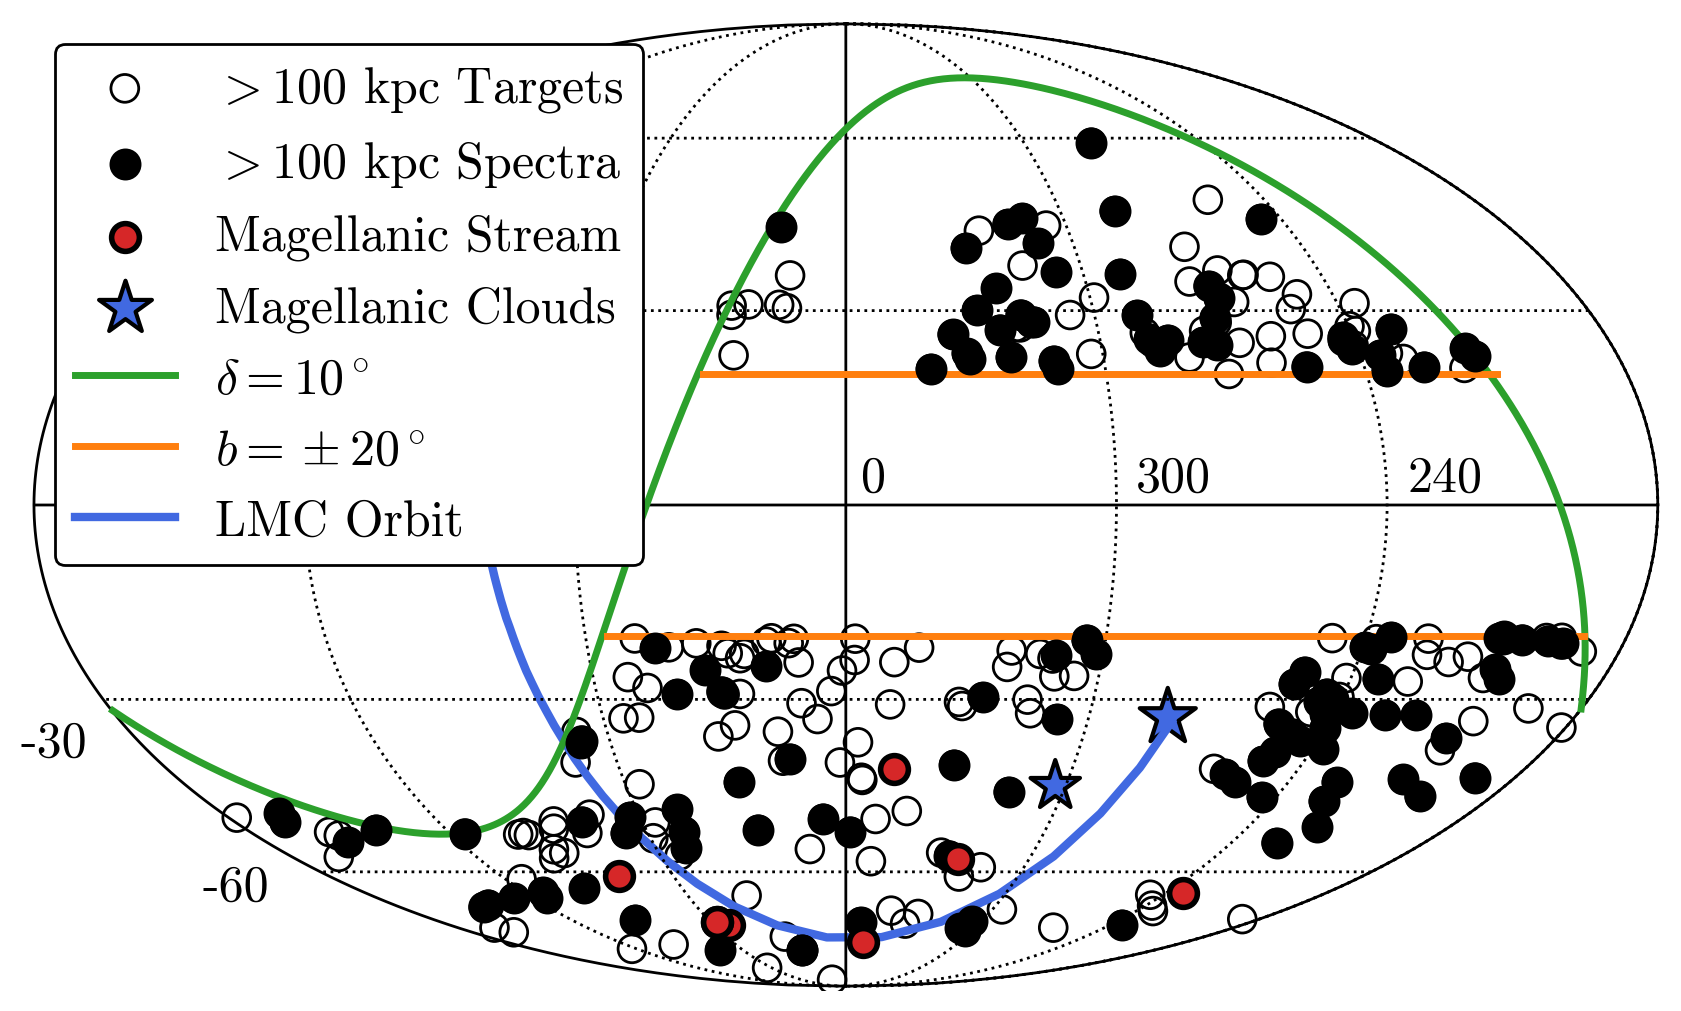

In [394]:
d0 = SkyCoord(ra = np.linspace(0, 360, 1000) * u.deg, dec = np.repeat(10, 1000) * u.deg).galactic

hp.mollview()
hp.graticule(dmer = 60)

hp.projscatter(d100targ['l'][dsel], d100targ['b'][dsel], lonlat = True,
              label = '$> 100$ kpc Targets', marker = 'o', facecolor = 'none', 
              edgecolor = 'k', s = 100)


# im = hp.projscatter(mage[clean]['L'], mage[clean]['B'], lonlat = True, 
#               c = mage[clean]['year'], cmap = 'viridis', edgecolor = 'k', 
#                    s = 100, label = 'MagE Spectra', zorder = 3,
#                    lw = 1.5)

hp.projscatter(mage[clean&d100sel]['L'], mage[clean&d100sel]['B'], lonlat = True, 
             color = 'k', cmap = 'viridis', edgecolor = 'k', 
                   s = 100, label = '$>100$ kpc Spectra', zorder = 3,
                   lw = 1.5)

hp.projscatter(mss['l'], mss['b'], lonlat = True, 
              s = 100, edgecolor = 'k', zorder = 4, facecolor = 'C3', lw = 2,
              label = 'Magellanic Stream')

hp.projscatter(clouds['l'], clouds['b'], lonlat = True, **cloud_kw, label = 'Magellanic Clouds')

hp.projplot(d0.l, d0.b, lonlat = True, color = 'C2', label = '$\delta = 10^\circ$', lw = 2.5)
hp.projplot(b20.l, b20.b, color = 'C1', lonlat = True, label = '$b = \pm 20^\circ$', lw = 2.5)
hp.projplot(bm20.l, bm20.b, color = 'C1', lonlat = True,  lw = 2.5)

hp.projplot(lmco['col4'], lmco['col5'], lonlat = True, lw = 3, 
           color = 'royalblue', label = "LMC Orbit", zorder = 1.5);

plt.legend(loc = 'upper left')

# cbar = plt.colorbar(im, location = 'bottom', orientation = 'horizontal',
#             fraction = 0.05, pad = 0.05)
plt.title('')
# cbar.ax.set_xlabel('Year')

ax = plt.gca()
add_labels(ax)

#plt.savefig('fig/d100_progress_map.pdf')

In [395]:
np.sum(clean)

232

In [396]:
np.sum(clean & (mage['Dist'] > 100))

59

In [397]:
np.sum(clean & (mage['Dist'] > 50))

191

In [398]:
dobs = np.isin(d100targ['source_id'], mage['tdb_source_id'])

In [399]:
np.sum(dobs & dsel)

137

In [400]:
obs = np.isin(mage['tdb_source_id'], d100targ['source_id'])

In [401]:
np.sum(dobs & dsel)

137

In [402]:
np.sum(clean & obs)

133

In [403]:
np.sum(clean & obs & (mage['Dist'] > 100)), np.sum(clean & obs & (mage['Dist'] > 50))

(49, 105)

In [404]:
62 / 125

0.496

In [405]:
100 / 125

0.8

In [406]:
np.sum(dsel) - np.sum(dobs & dsel)

147

In [407]:
(np.sum(dsel) - np.sum(dobs & dsel)) / 18

8.166666666666666

In [408]:
from astropy.coordinates import Angle

In [409]:
def mkquants(x):
    return np.array([np.quantile(x, 0.05), np.quantile(x, 0.5), np.quantile(x, 0.95)])

In [410]:
left = d100targ[dsel & ~dobs]

In [411]:
Angle(mkquants(left['RA']) * u.deg).hms

hms_tuple(h=array([ 1., 16., 23.]), m=array([42., 45., 34.]), s=array([40.82380947,  1.72005712,  3.48105345]))

In [412]:
Angle(mkquants(left['DEC']) * u.deg)

<Angle [-70.17548426, -18.92795913,   5.97287152] deg>

In [413]:
mkquants(left['phot_g_mean_mag'])

array([17.67620125, 18.33560562, 18.48403835])

In [414]:
mage[clean & (mage['Dist'] > 100) & (mage['Dist'] > 100)]

<Table length=59>
   name       date    ... Sgr_FLAG        year       
 bytes32    bytes10   ...  int16        float64      
---------- ---------- ... -------- ------------------
j2139m4847 2022_08_03 ...        0 2022.5892597979569
j2159m0853 2022_08_03 ...        0 2022.5892879052906
j2241m1443 2022_08_03 ...        1 2022.5893135726417
j2254p0331 2022_08_04 ...        0 2022.5922097371156
j2337m1922 2022_08_04 ...        0  2022.592360002028
j0010m1834 2022_08_04 ...        1   2022.59238383147
j0040m2725 2022_08_04 ...        1  2022.592409372069
j2203p0725 2022_08_05 ...        1 2022.5945655563162
j2128m2102 2022_10_21 ...        0  2022.805086223287
j2201m4152 2022_10_21 ...        1 2022.8051434519734
j2208m1040 2022_10_21 ...        0 2022.8051736507211
j2234m0331 2022_10_21 ...        0 2022.8052293266915
       ...        ... ...      ...                ...
j1315m1708 2023_02_07 ...        0 2023.1040184614799
j1119m0621 2023_02_08 ...        1 2023.1065338935787
j1306m2706 2023_02_08 ...        1 2023.1066965485334
j1344m1343 2023_02_08 ...        0 2023.1068424404898
j0454m3444 2023_03_06 ...        0 2023.1774442289654
j0520m3207 2023_03_06 ...        0 2023.1774972748244
j0525m3713 2023_03_06 ...        0 2023.1775501939312
j0609m3117 2023_03_06 ...        0 2023.1776043171851
j0918m1148 2023_03_06 ...        0 2023.1778243592669
j0919m1118 2023_03_06 ...        0 2023.1778713843892
j1054m2114 2023_03_06 ...        0 2023.1780219978705
j0525m3713 2023_03_28 ...        0  2023.237689146196
j0543m3838 2023_03_28 ...        0 2023.2377535363905

In [415]:
284 * 0.5

142.0

In [416]:
284 * 0.8

227.20000000000002

In [417]:
mage[clean & (mage['Dist'] > 50)]

<Table length=191>
   name       date    ... Sgr_FLAG        year       
 bytes32    bytes10   ...  int16        float64      
---------- ---------- ... -------- ------------------
j2110m2425 2022_08_03 ...        1 2022.5892340672294
j2139m4847 2022_08_03 ...        0 2022.5892597979569
j2159m0853 2022_08_03 ...        0 2022.5892879052906
j2241m1443 2022_08_03 ...        1 2022.5893135726417
j2243m4111 2022_08_03 ...        0 2022.5895062679037
j2213m4259 2022_08_03 ...        0  2022.589529463584
j2222m1555 2022_08_03 ...        1 2022.5895807665981
j2223m0725 2022_08_03 ...        0 2022.5896051347377
j2224p0647 2022_08_03 ...        0  2022.589700832763
j2334m2043 2022_08_03 ...        0 2022.5897244087002
j2357m3614 2022_08_03 ...        0 2022.5897519139605
j0000m1137 2022_08_03 ...        0 2022.5897763137882
       ...        ... ...      ...                ...
j0520m3207 2023_03_06 ...        0 2023.1774972748244
j0525m3713 2023_03_06 ...        0 2023.1775501939312
j0609m3117 2023_03_06 ...        0 2023.1776043171851
j0918m1148 2023_03_06 ...        0 2023.1778243592669
j0919m1118 2023_03_06 ...        0 2023.1778713843892
j1054m2114 2023_03_06 ...        0 2023.1780219978705
j0501p0559 2023_03_28 ...        0 2023.2375609678809
j0525m3713 2023_03_28 ...        0  2023.237689146196
j0543m3838 2023_03_28 ...        0 2023.2377535363905
j1149m8535 2023_03_28 ...        0 2023.2380092275712
j1338m8320 2023_03_28 ...        0 2023.2380551119222
j1417m3228 2023_03_28 ...        0 2023.2383265520825
j1659m8142 2023_03_28 ...        0  2023.238582908713

In [418]:
mage[clean & (mage['logg'] > 3.5)]

<Table length=17>
   name       date    ... Sgr_FLAG        year       
 bytes32    bytes10   ...  int16        float64      
---------- ---------- ... -------- ------------------
j0050m4437 2022_11_03 ...        0 2022.8407069929272
j0510m0613 2022_11_03 ...        0 2022.8412342510203
j0121m0459 2022_12_18 ...        0 2022.9639878507871
j0513m4234 2022_12_18 ...        0 2022.9642114102467
j1458m3229 2023_02_08 ...        0 2023.1069144675134
j0345m1104 2023_03_06 ...        0  2023.177340070221
j0415m4016 2023_03_06 ...        0 2023.1773964433291
j1042m3042 2023_03_06 ...        0   2023.17796831825
j0521m0134 2023_03_28 ...        0 2023.2376291606458
j0814p0954 2023_03_28 ...        0 2023.2378214122748
j0931m2154 2023_03_28 ...        0 2023.2379359964002
j1331m4124 2023_03_28 ...        0 2023.2381146855273
j1333m4004 2023_03_28 ...        0  2023.238178727153
j1345m3325 2023_03_28 ...        0 2023.2382528139021
j1418m3707 2023_03_28 ...        0  2023.238388375542
j1501m2832 2023_03_28 ...        0 2023.2384506743224
j1457m3334 2023_03_28 ...        0 2023.2385258384668

In [419]:
16 / np.sum(clean)

0.06896551724137931

In [420]:
def gtrhist(x, dbins):
    counts = [];

    for ii in range(len(dbins)):
        di = dbins[ii]
        counts.append(np.sum(x > di))

    counts = np.array(counts)
    
    return counts

dbins = np.linspace(1, 160, 100)

In [421]:
nstar_mage = gtrhist(mage[clean]['Dist'], dbins)
nstar_h3 = gtrhist(h3['dist_adpt'][hgiants], dbins)
# nstar_gaia = gtrhist(tab2['r_med_geo'] / 1000, dbins)

KeyError: 'dist_adpt'

In [ ]:
# plt.plot(dbins, nstar_gaia / np.max(nstar_gaia), color = 'darkgray', lw = 2.5, ls = ':', label = 'Gaia DR3')
plt.plot(dbins, nstar_h3 / np.max(nstar_h3), color = 'gray', lw = 3, ls = '--', label = 'H3 Survey')
plt.plot(dbins, nstar_mage / np.max(nstar_mage), color = 'C3', lw = 3.5, label = 'MagE Survey')



#plt.yscale('log')
#plt.xscale('log')

plt.legend(framealpha = 0)

plt.ylabel('Fraction of Stars $>$ Distance')
plt.xlabel('Distance [kpc]')

plt.savefig('fig/distance_h3comp.pdf')

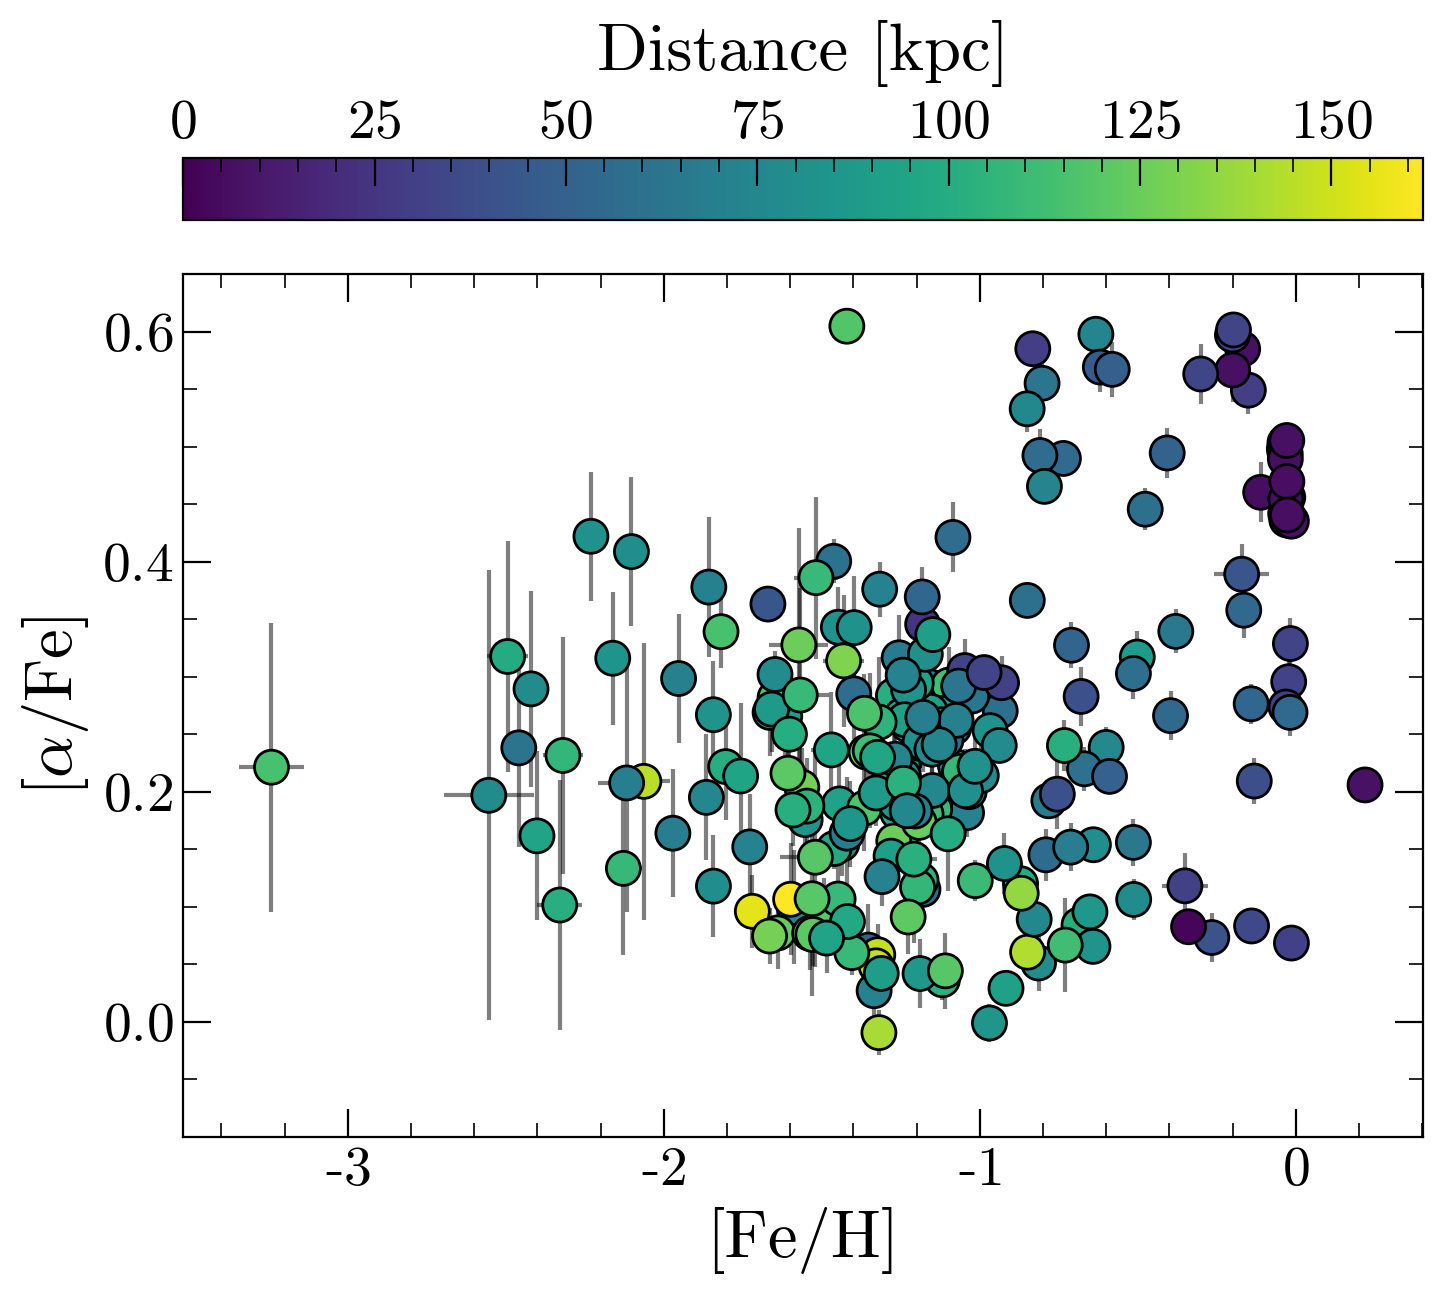

In [422]:
plt.figure(figsize = (8, 7))
plt.scatter(mage[clean]['FeH'], mage[clean]['aFe'], 
            c = mage[clean]['Dist'], cmap = 'viridis', s = 150, edgecolor = 'k',
           vmin = 0)
plt.errorbar(mage[clean]['FeH'], mage[clean]['aFe'], xerr = mage[clean]['FeH_err'],
             yerr = mage[clean]['aFe_err'], 
             linestyle = 'none', zorder = 0, ecolor = 'k', alpha = 0.5)

plt.xlabel('[Fe/H]')
plt.ylabel(r'[$\alpha$/Fe]')
plt.ylim(-0.1, 0.65)
cbar = plt.colorbar(location = 'top', orientation = 'horizontal')
cbar.ax.set_xlabel('Distance [kpc]', labelpad = 10.5)

plt.savefig('fig/tw_distance.pdf')

### Other Plots

In [423]:
far = mage['Dist'] > 40

In [424]:
lmc = [280, -32]
smc = [302, -44]
lmc_orb = np.genfromtxt('ngc21_LMC_orbit.txt')
lmc_orbl = lmc_orb[:, 3]
lmc_orbb = lmc_orb[:, 4]
orbsel = lmc_orbb < -20
plume_l = np.array([-25, 100])
plume_b = np.array([-90, -30])

In [425]:
from astropy.coordinates import Angle
from astropy import units as u

In [426]:
mage['lw'] = Angle(mage['L'] * u.deg).wrap_at('180d').value
mage['pl'] = np.array(['pscpl' in sel for sel in mage['tdb_selection']])
c1 = -40
c2 = 2
pl = (
    clean & 
    (mage['pl'])&
    (mage['lw'] < 60)&
#     ((table['lw'] > 10))&
    (mage['B'] > -70)&
    (mage['B'] < c1 + c2 * mage['lw'])
#     (table['b' ] < 0)&
#     (table['Dist'] < 90)
)


0.0 180.0 -180.0 180.0


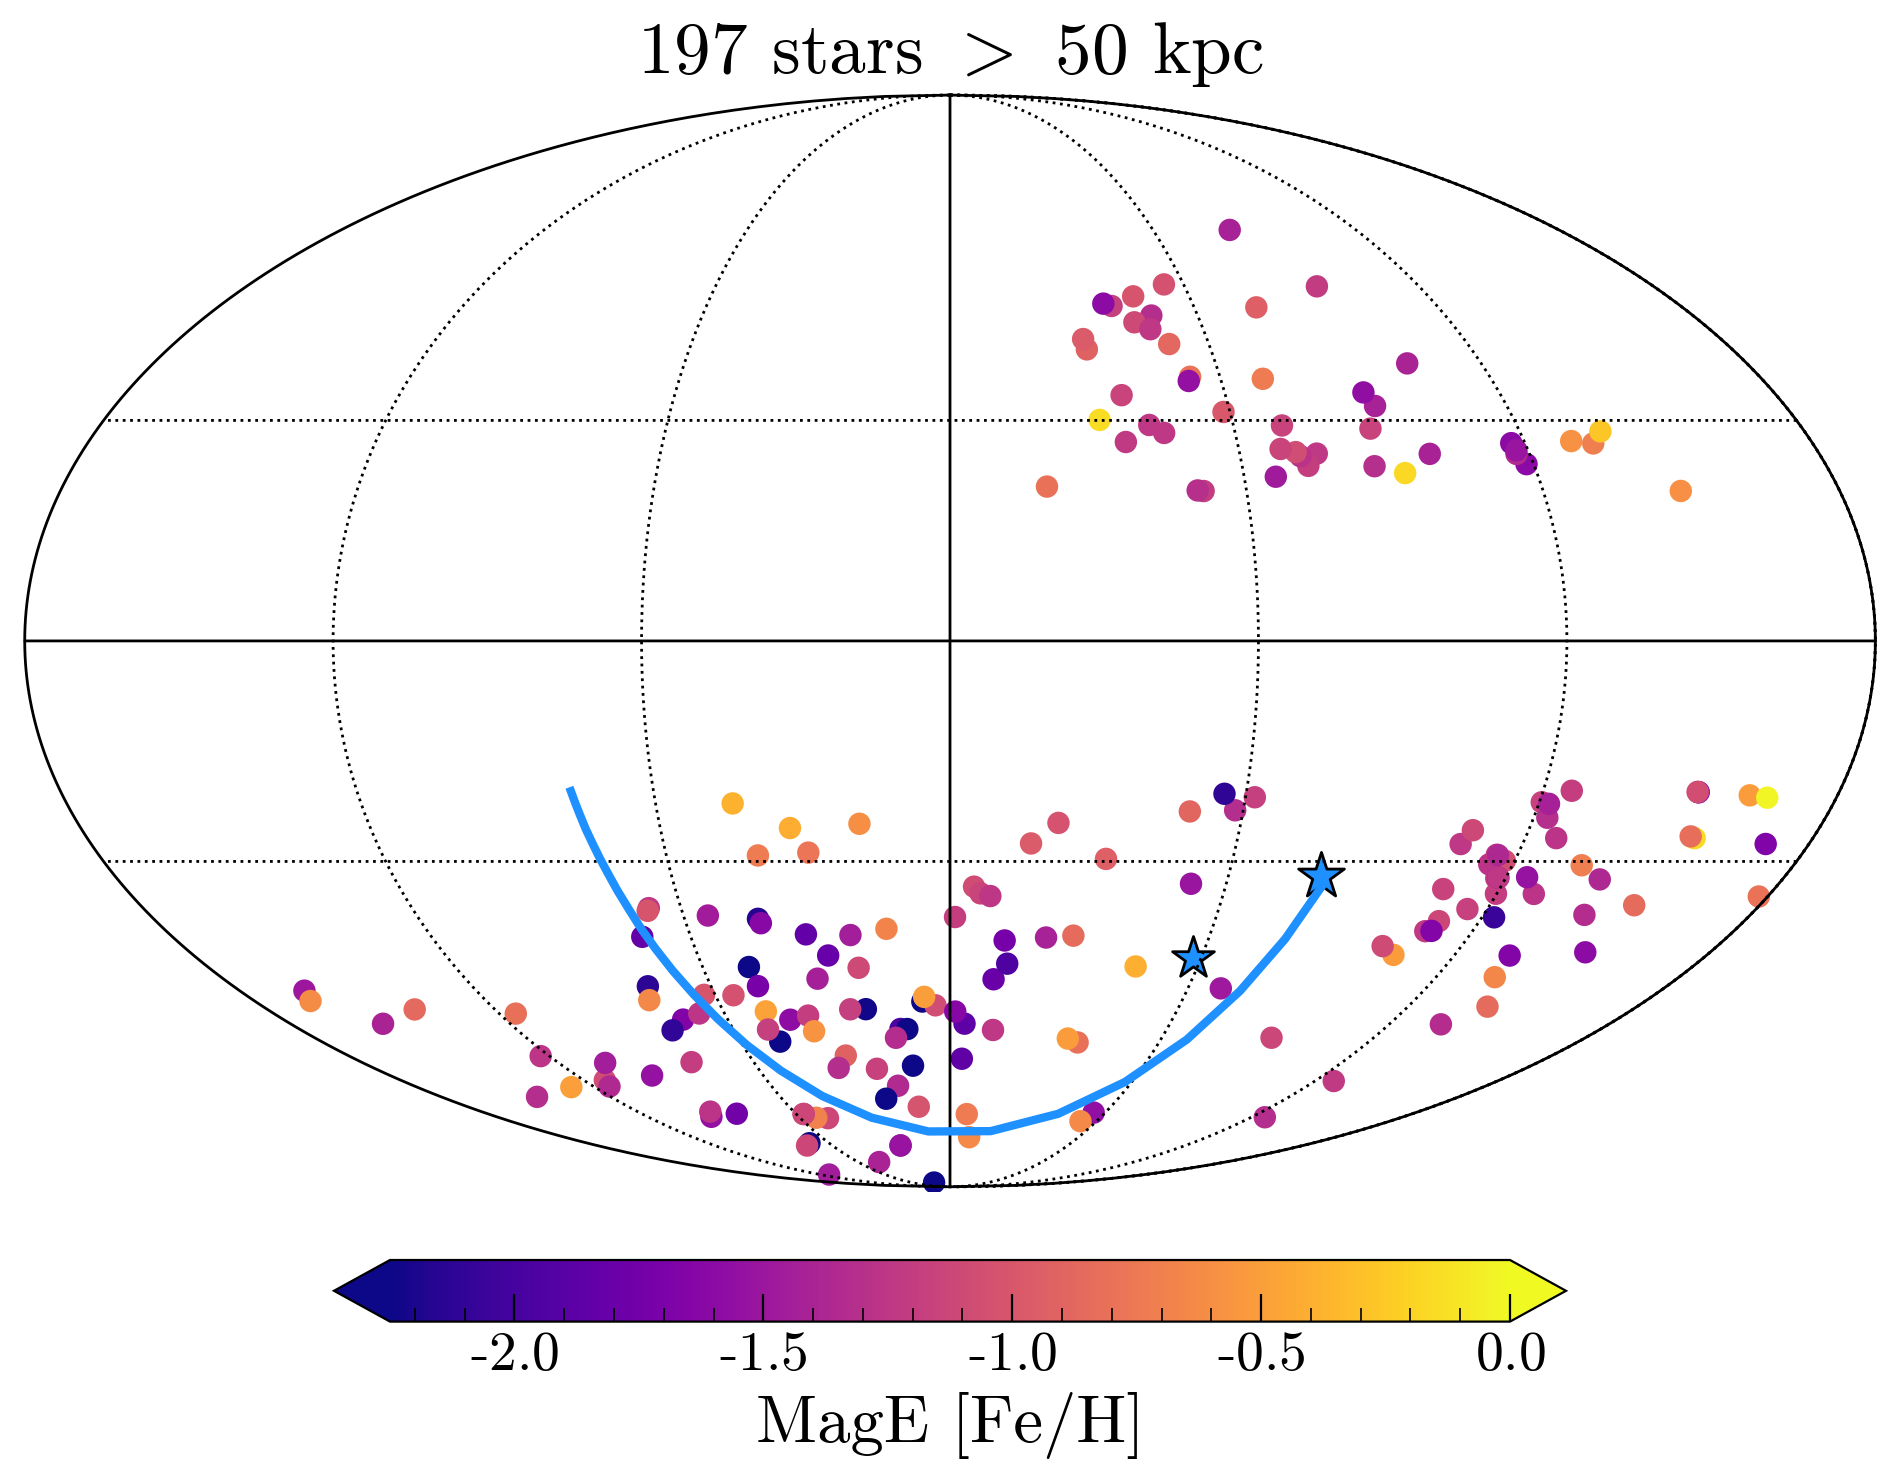

In [427]:
plt.figure(figsize = (12,8))
hp.mollview(hold = True)
hp.graticule(dpar = 60)

im = hp.projscatter(mage[clean&far]['L'], mage[clean&far]['B'], lonlat = True, s = 50, 
              c = mage[clean&far]['FeH'], cmap = 'plasma', vmin = -2.25, vmax = 0)
plt.title('%s stars $>$ 50 kpc' % np.sum(clean&far))

cbar = plt.colorbar(im, location = 'bottom', orientation = 'horizontal', fraction = 0.05, pad = 0.055, extend = 'both')
cbar.ax.set_xlabel('MagE [Fe/H]')

hp.projplot(lmc_orbl[orbsel], lmc_orbb[orbsel], coord = 'G', lonlat = True, color = 'dodgerblue',
           lw = 3, ls = '-')

# hp.projscatter(mage[pl]['L'], mage[pl]['B'], lonlat = True)

hp.projscatter(lmc[0], lmc[1], coord = 'G', lonlat = True, marker = '*', s = 300, edgecolor = 'k',
              color = 'dodgerblue', label = 'LMC')

hp.projscatter(smc[0], smc[1], coord = 'G', lonlat = True, marker = '*', s = 250, edgecolor = 'k',
              color = 'dodgerblue', label ='SMC')

In [428]:
ekw = dict(linestyle = 'none', marker = 'o', color = 'k', 
          capsize = 0)

In [429]:
from astropy.io import ascii

In [327]:
h21_smc = ascii.read('plume/smc.csv')
h21_lmc = ascii.read('plume/lmc.csv')
h21_gse = ascii.read('plume/gse.csv')
from scipy.interpolate import UnivariateSpline as Spline

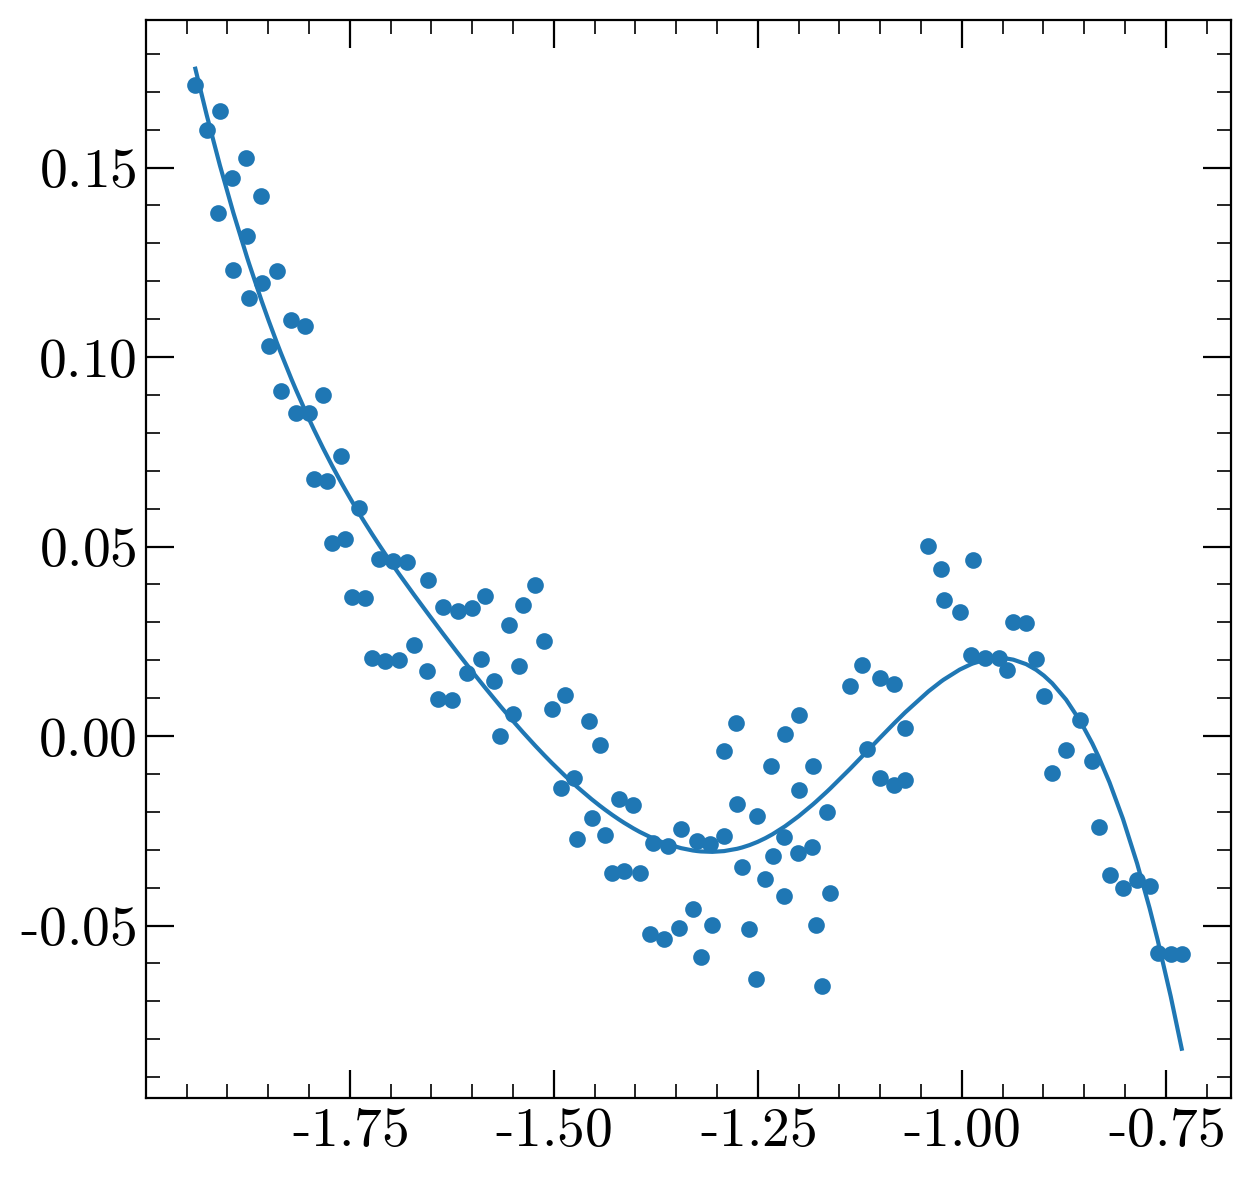

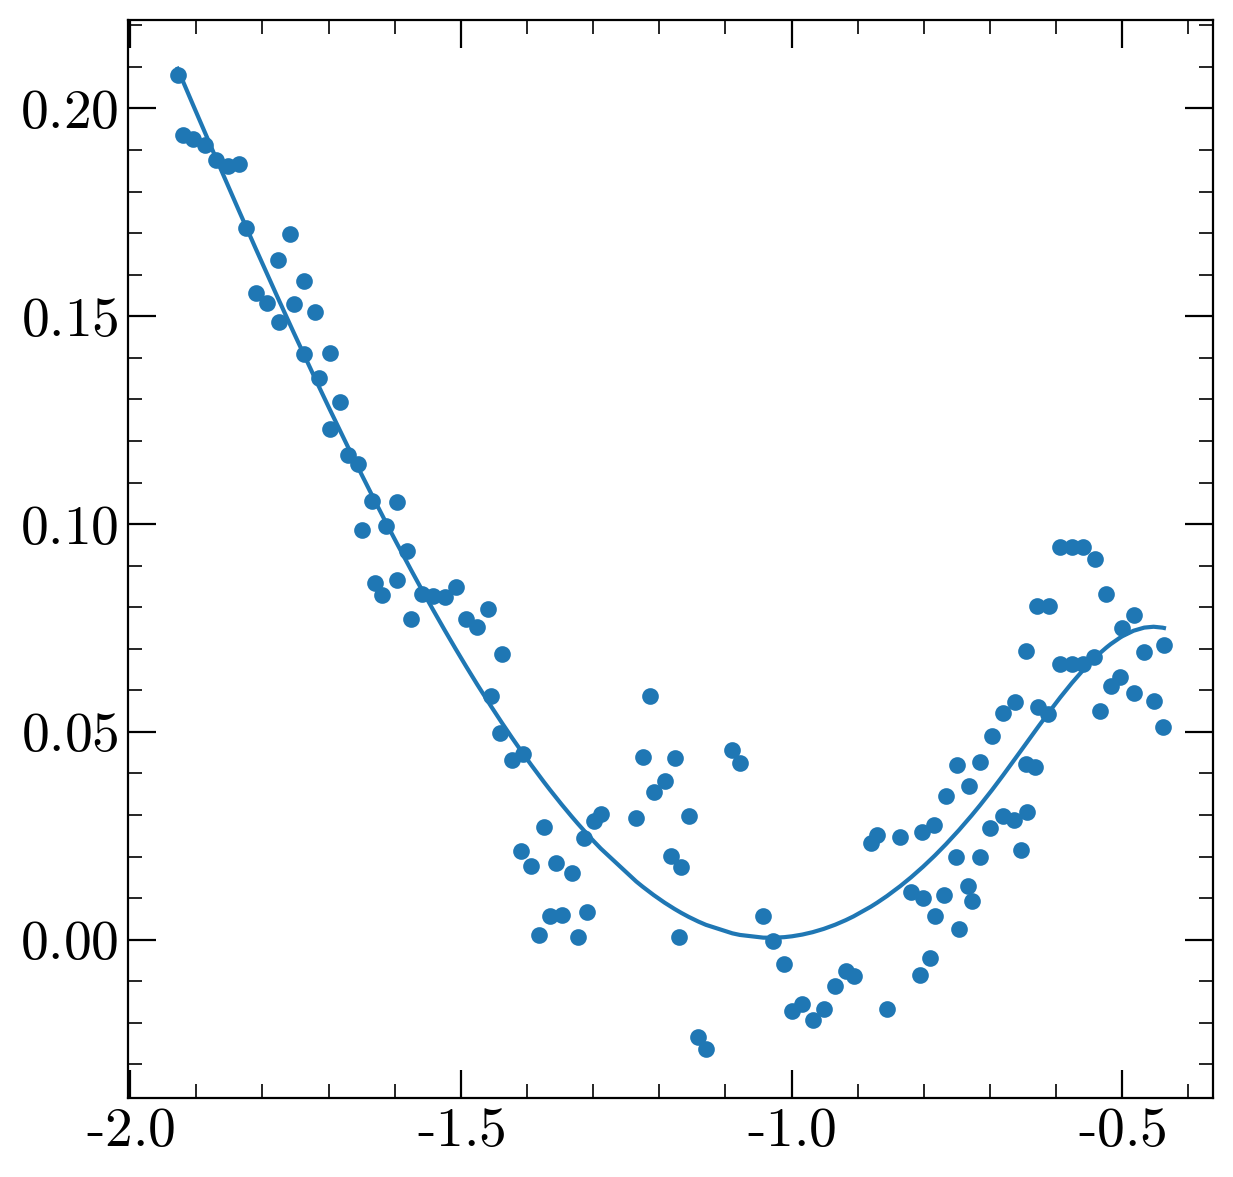

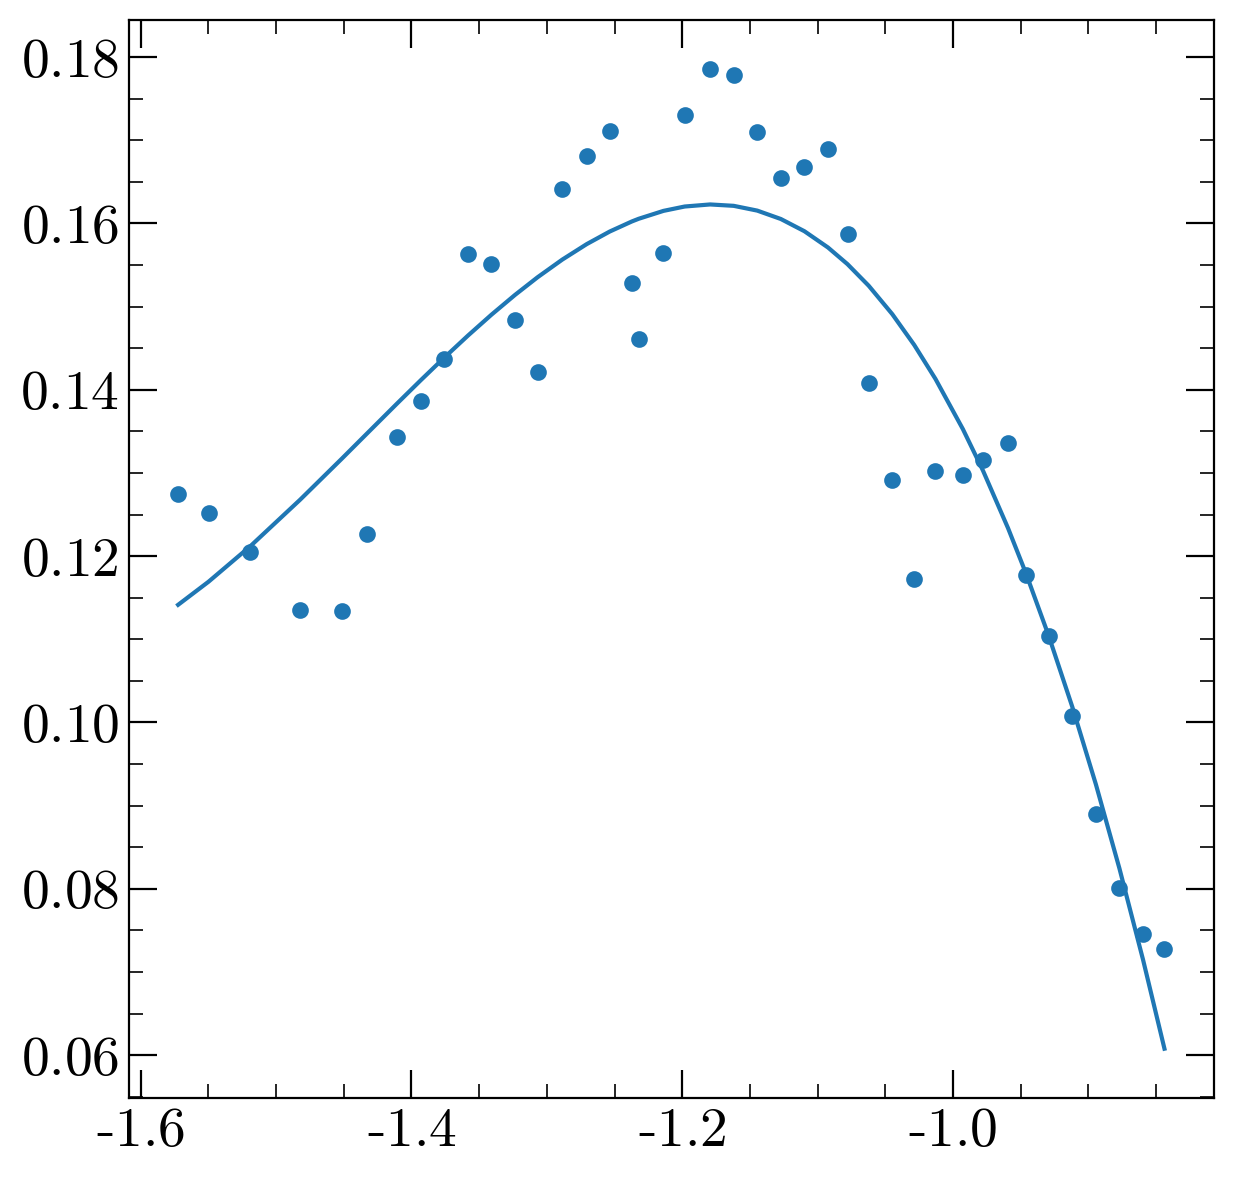

In [328]:
for tab in [h21_smc, h21_lmc, h21_gse]:
    x = tab['col1']
    y = tab['col2']
    
    spl = Spline(x, y, s = 4e-2)

    tab['col3'] = spl(x)

    plt.scatter(tab['col1'], tab['col2'])
    plt.plot(x, tab['col3'])
    plt.show()

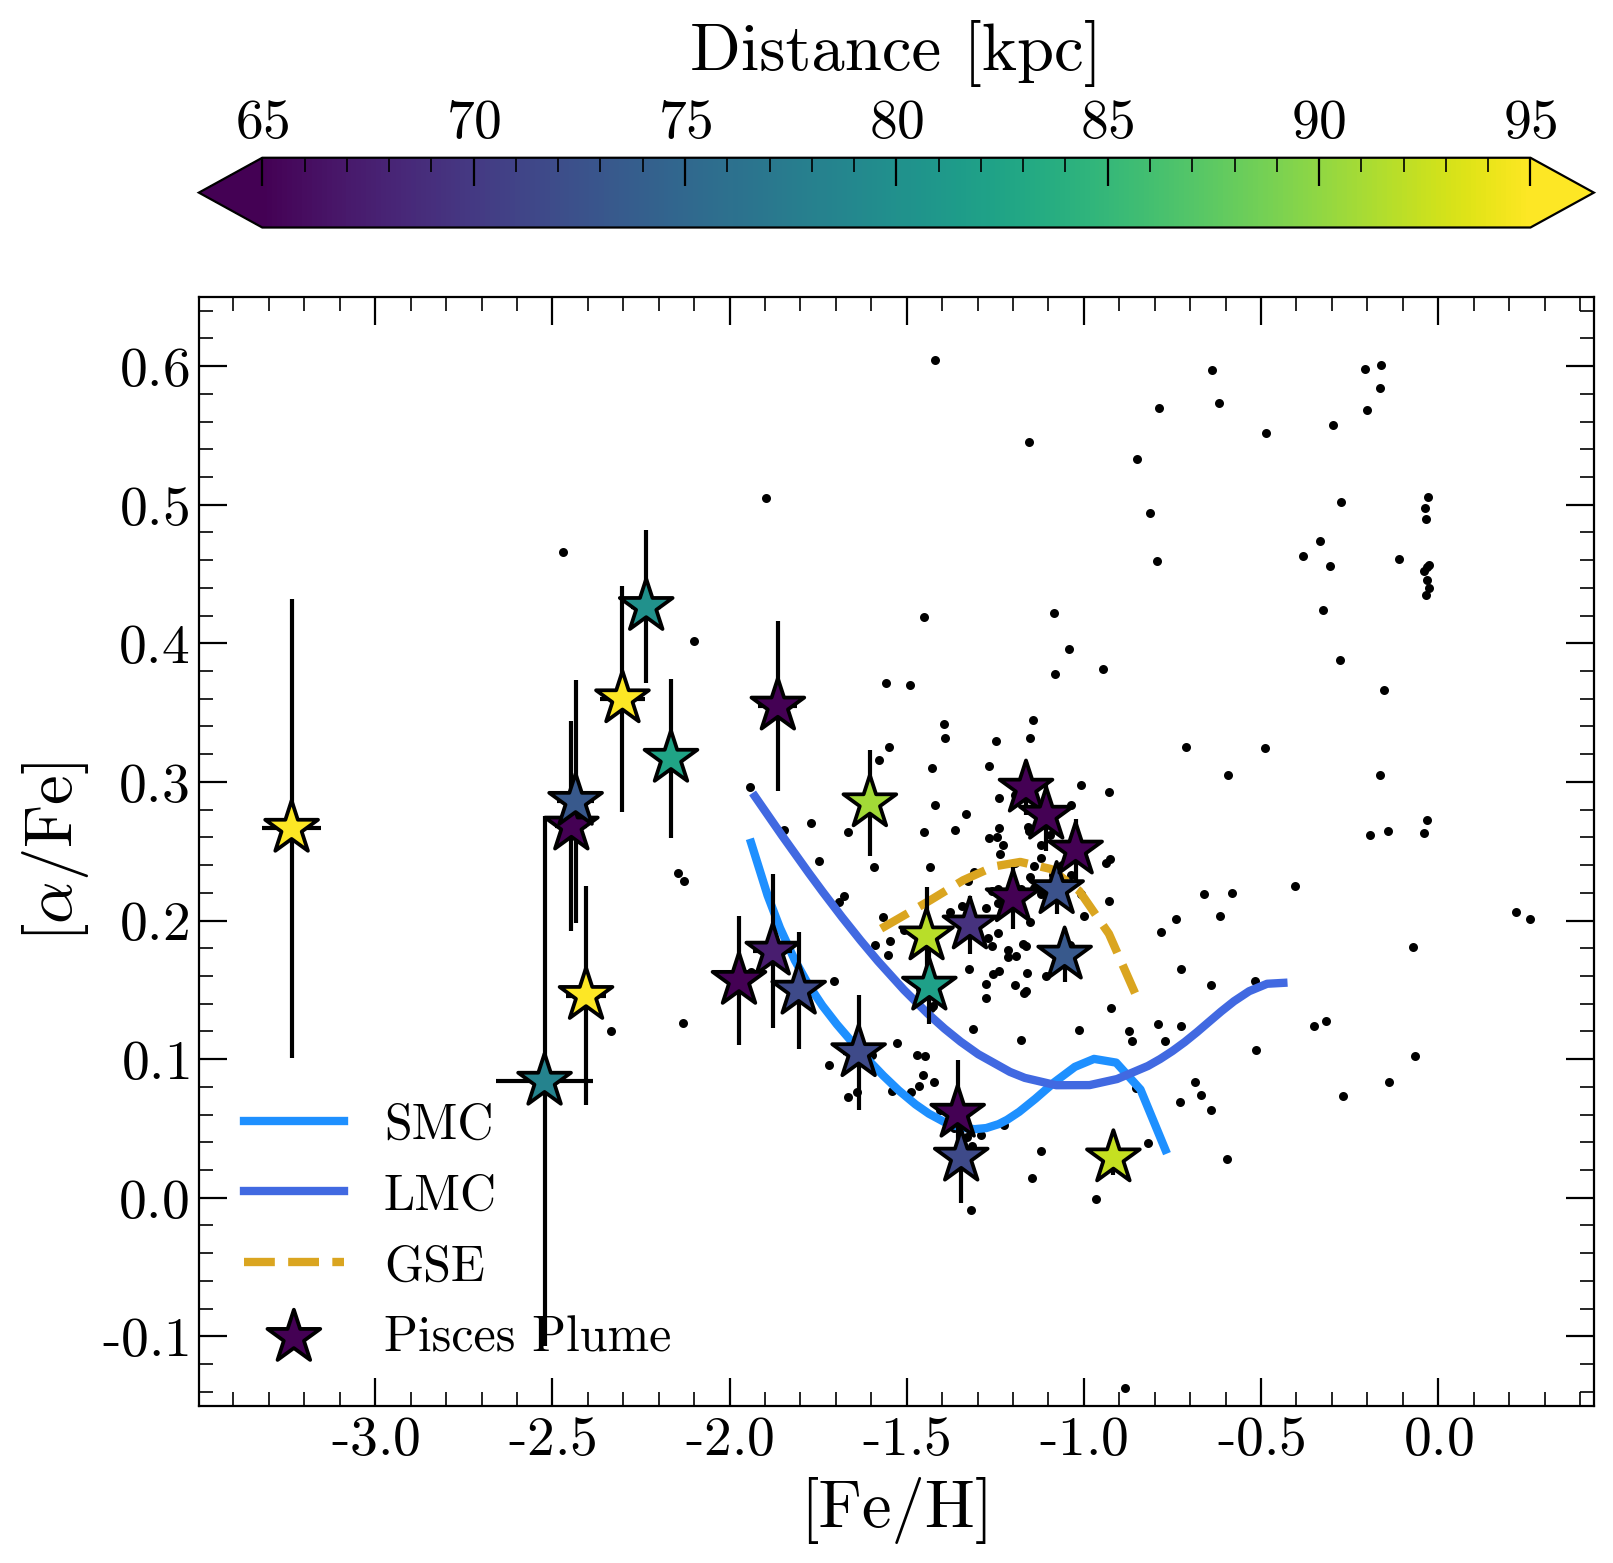

In [329]:
plt.figure(figsize = (9, 9))

sk = 5
afac = 0.08
plt.plot(h21_smc['col1'][::sk], h21_smc['col3'][::sk] + afac, color = 'dodgerblue', ls = '-', lw = 3,
        label = 'SMC')
plt.plot(h21_lmc['col1'][::sk], h21_lmc['col3'][::sk] + afac, color = 'royalblue', ls = '-', lw = 3,
        label = 'LMC')
plt.plot(h21_gse['col1'][::sk], h21_gse['col3'][::sk] + afac, color = 'goldenrod', ls = '--', lw = 3,
        label = "GSE")

plt.scatter(mage[clean]['FeH'], mage[clean]['aFe'], color = 'k', s = 5
)

plt.errorbar(mage[pl]['FeH'], mage[pl]['aFe'],
            xerr = mage[pl]['FeH_err'], yerr = mage[pl]['aFe_err'],
            **ekw)

plt.scatter(mage[pl]['FeH'], mage[pl]['aFe'], c = mage[pl]['Dist'],
           s = 400, cmap = 'viridis', edgecolor = 'k', zorder = 10, vmin = 65, vmax = 95,
           label = 'Pisces Plume', marker = '*', linewidth = 1.35)

plt.ylim(-0.15, 0.65)

cbar = plt.colorbar(location = 'top', orientation = 'horizontal', extend = 'both')
cbar.ax.set_xlabel('Distance [kpc]', labelpad = 10.5)
plt.xlabel('[Fe/H]')
plt.ylabel(r'[$\alpha$/Fe]')

plt.legend(loc = 'lower left', framealpha = 0)

### Comparison To H3

In [440]:
h3['GAIAEDR3_ID'] = h3['h3_GAIAEDR3_ID']

In [441]:
table = astropy.table.join(mage, h3, keys = 'GAIAEDR3_ID', join_type = 'left')

In [442]:
table['h3_Dist'] = table['h3_dist_adpt']
table['h3_Dist_err'] = table['h3_dist_adpt_err']

In [443]:
clean = (

    (table['h3_FLAG'] == 0)&
    (table['Vrot'] < 20)

)

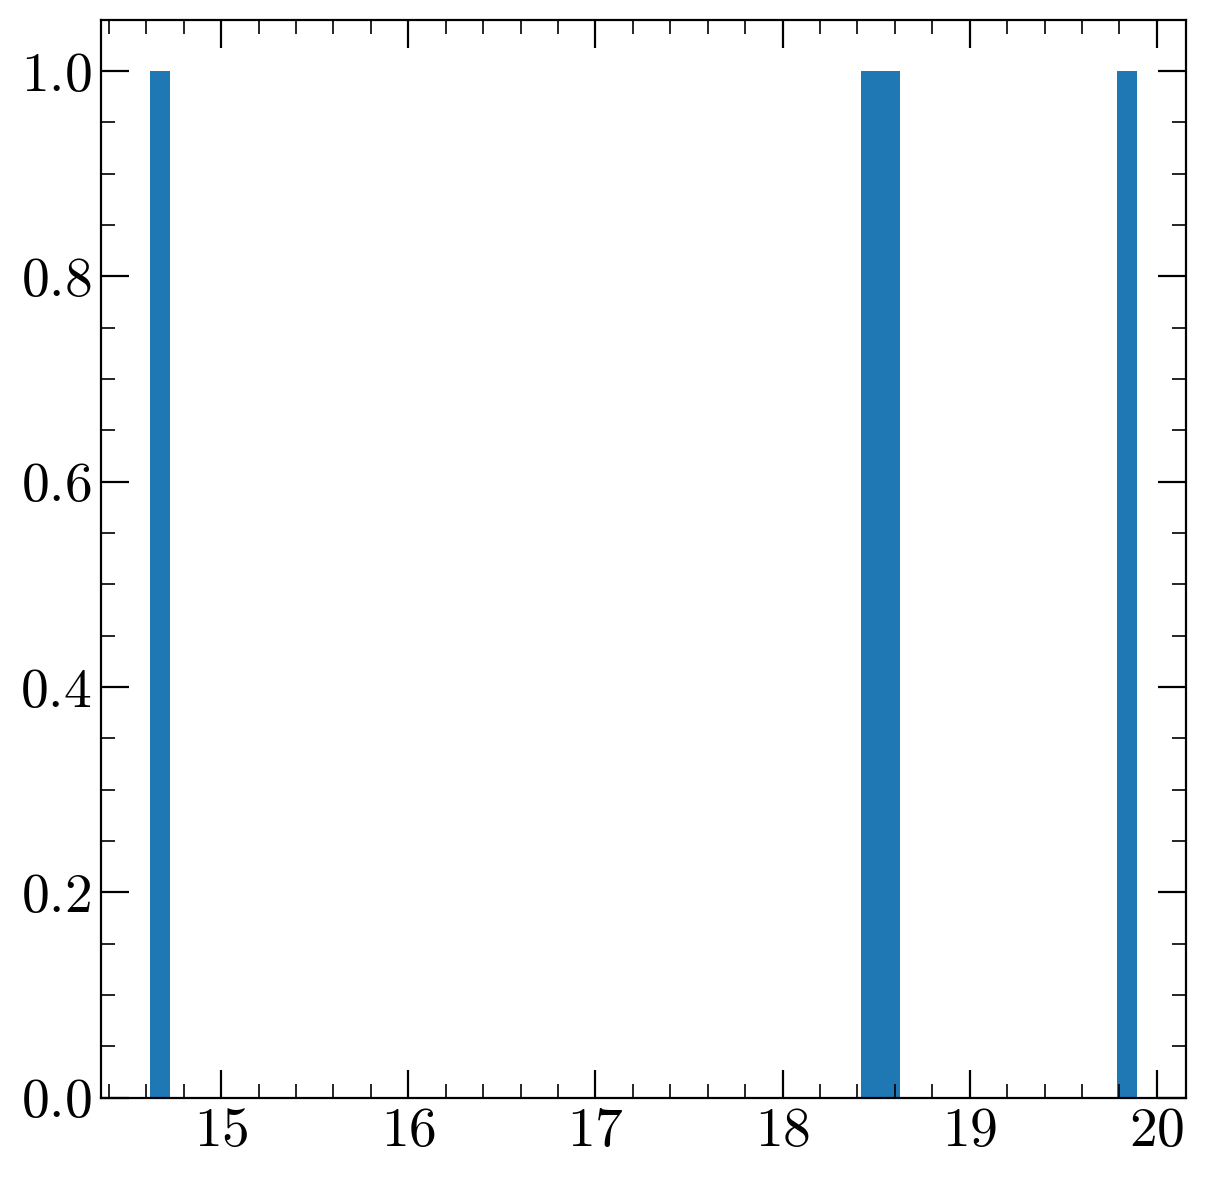

In [444]:
plt.hist(table[clean]['Vrot'], bins = 50);

In [445]:
plt.scatter(table['h3_Vrad'][clean], table['Vrad'][clean])

In [446]:
ekw = dict(linestyle = 'none', marker = 'o', color = 'k', ecolor = 'gray', capsize = 0)
fs = 22

In [447]:
def comp(x):
    mins = np.nanmin([np.nanmin(table['h3_' + x][clean]), 
                                 np.nanmin(table[x][clean])])
    maxs = np.nanmax([np.nanmax(table['h3_' + x][clean]), 
                                 np.nanmax(table[x][clean])])
    lims = [mins - 0.1 * np.abs(mins), maxs + 0.1 * np.abs(maxs)]
    
    diff =  table[x][clean] - table['h3_' + x][clean]
    
    mad = np.median(np.abs(diff))
    bias = np.median(diff)

    plt.errorbar(table['h3_' + x][clean], table[x][clean],
                xerr = table['h3_' + x + '_err'][clean], yerr = table[x + '_err'][clean], **ekw)

    plt.plot(lims, lims, 'C3')
    plt.title('MAD: %.2f, Bias: %.2f' % (mad, bias), fontsize = fs)
    
    plt.xlim(lims)
    plt.ylim(lims)
    
    #if x == 'Dist':
    #    plt.xscale('log')
    #    plt.yscale('log')

/Users/vedantchandra/opt/miniconda3/envs/outerhalo/lib/python3.8/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)

/Users/vedantchandra/opt/miniconda3/envs/outerhalo/lib/python3.8/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)

/Users/vedantchandra/opt/miniconda3/envs/outerhalo/lib/python3.8/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)

/Users/vedantchandra/opt/miniconda3/envs/outerhalo/lib/python3.8/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)

/Users/vedantchandra/opt/min

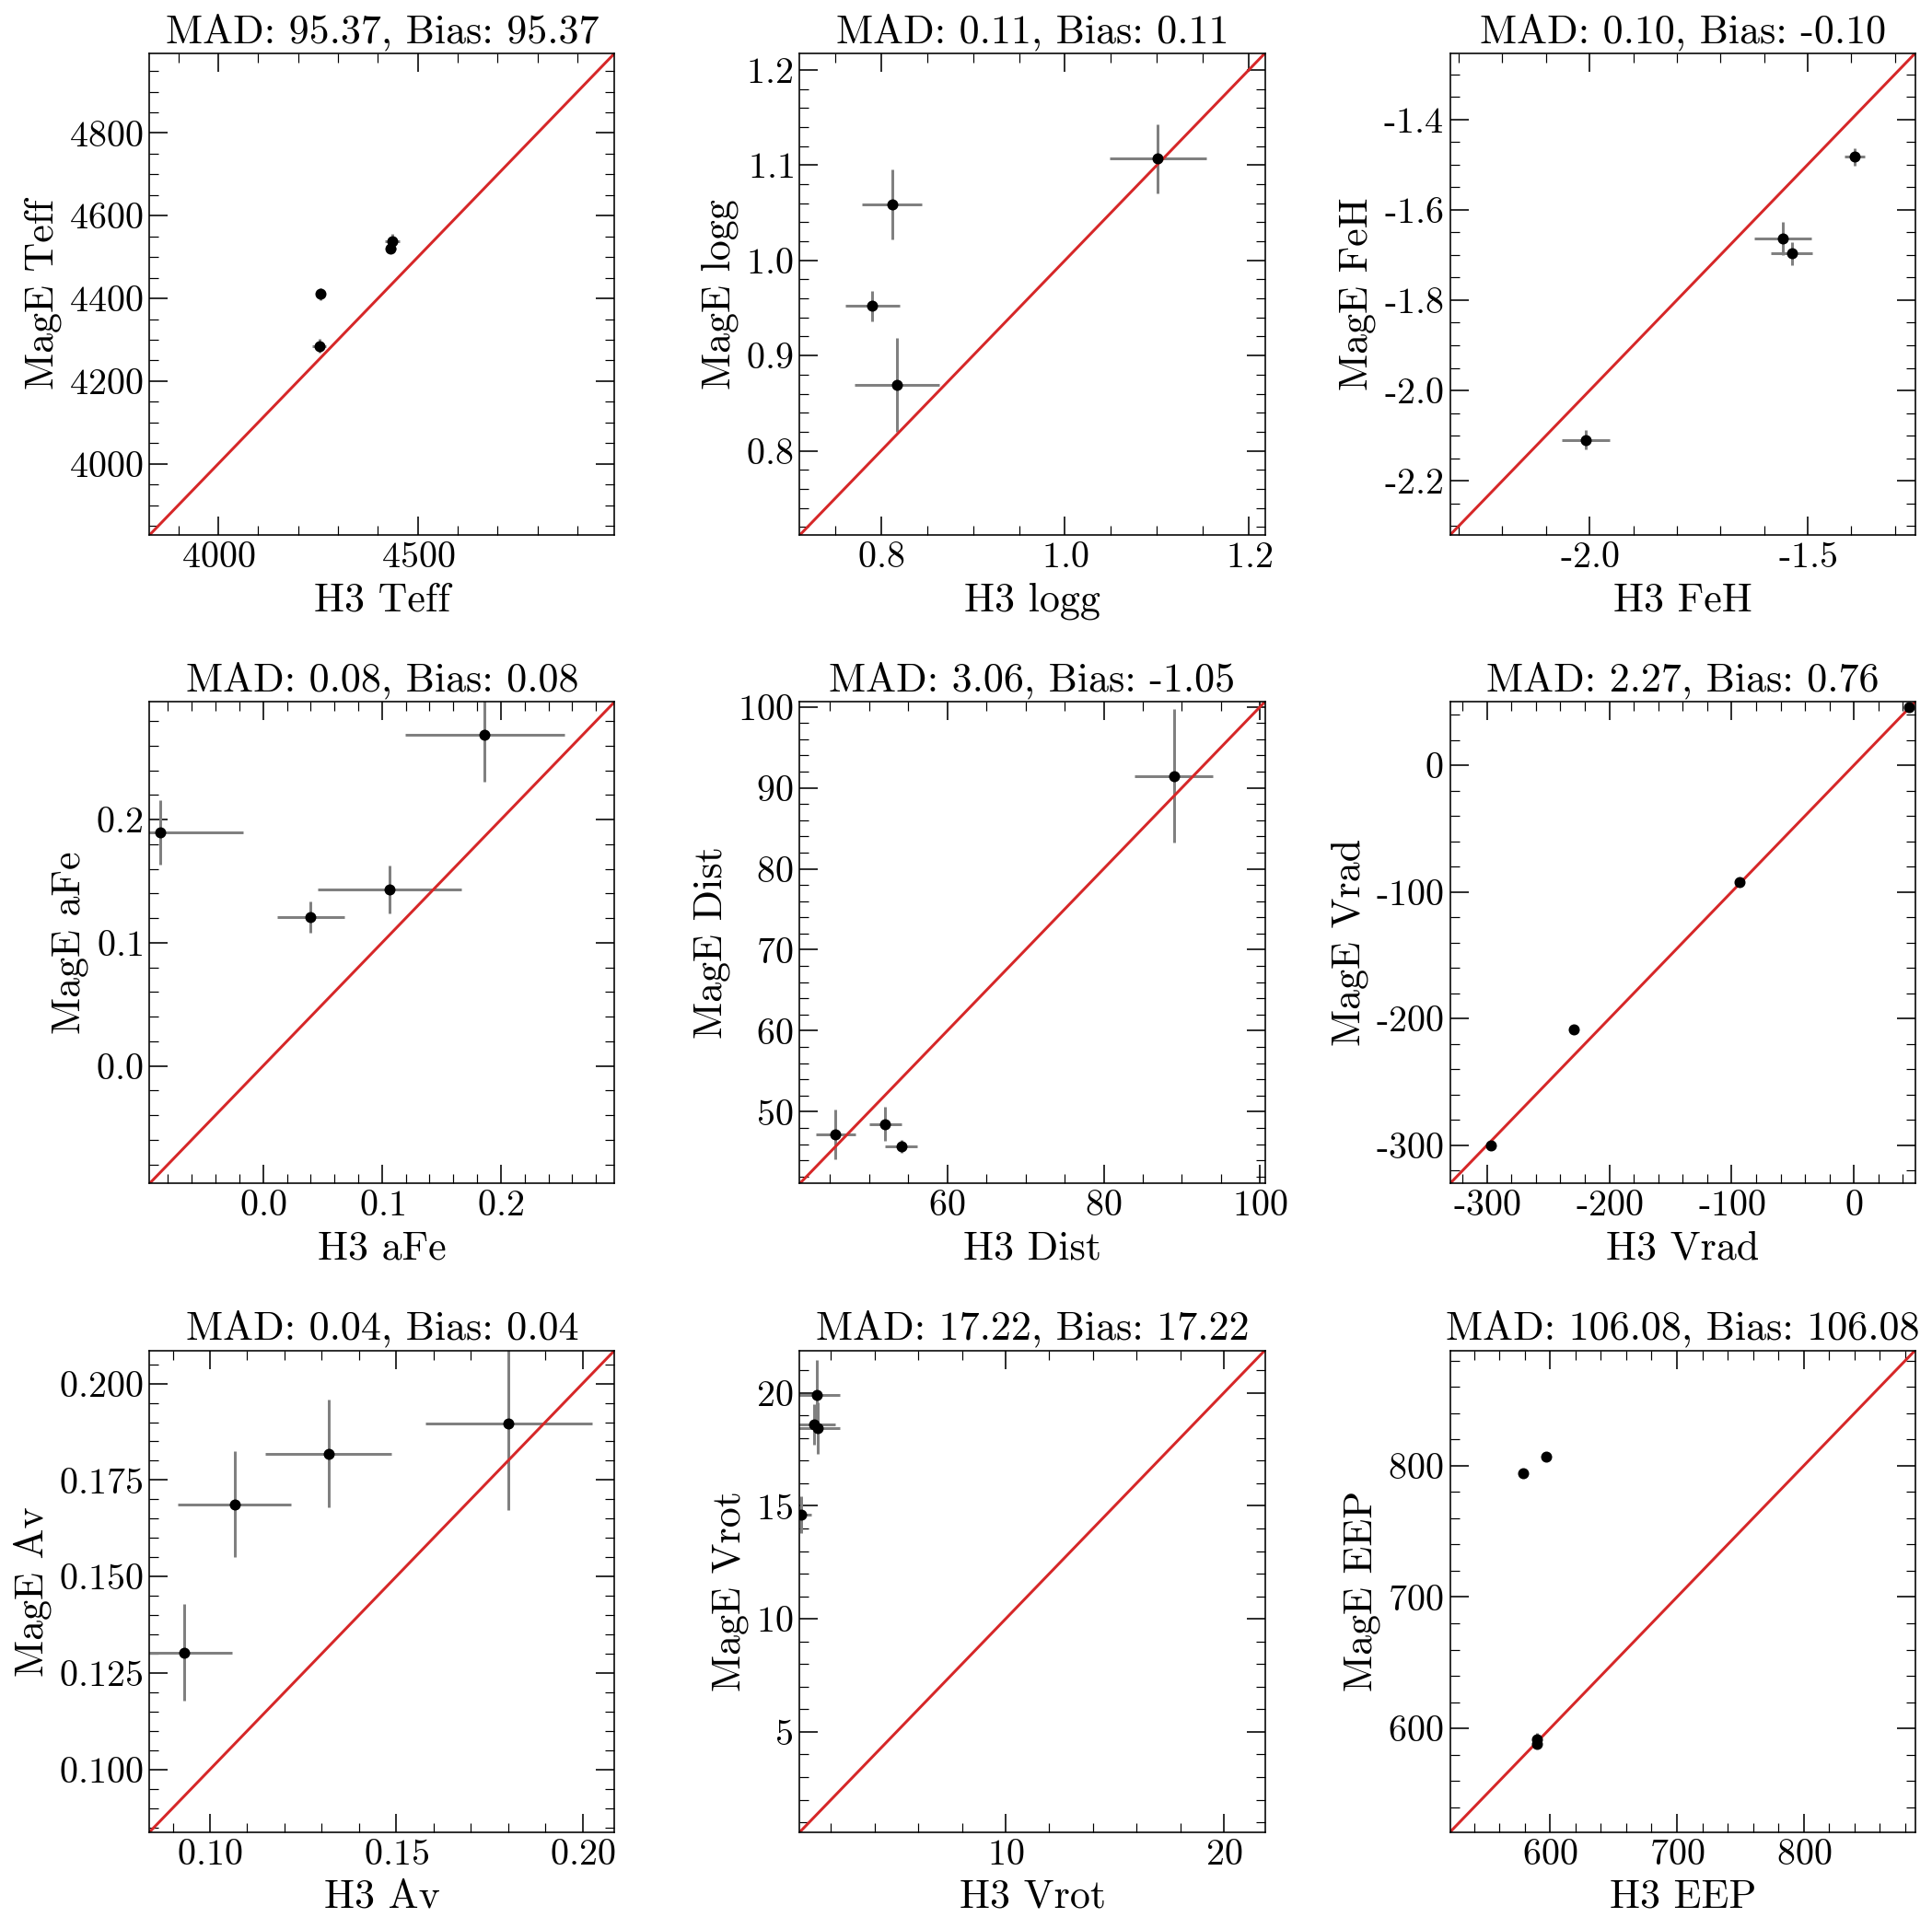

In [448]:
f,axs = plt.subplots(3,3,figsize = (15, 15))
axr = axs.ravel()

labels = ['Teff', 'logg', 'FeH', 'aFe', 'Dist', 'Vrad', 'Av', 'Vrot', 'EEP']

for ii in range(len(labels)):
    plt.sca(axr[ii])
    comp(labels[ii])
    
    plt.xlabel('H3 ' + labels[ii], fontsize = fs)
    plt.ylabel('MagE ' + labels[ii], fontsize = fs)
    
plt.tight_layout()

In [15]:
table[clean][np.abs((table['Vrad'][clean] - table['h3_Vrad'][clean])) > 5]

<Table length=1>
   name       date    ...      h3_Dist         h3_Dist_err   
 bytes32    bytes10   ...      float64           float64     
---------- ---------- ... ----------------- -----------------
j2305m1404 2022_10_21 ... 45.73201655921349 2.585488188830503

### RVS

In [16]:
tab = Table.read('/n/holyscratch01/conroy_lab/vchandra/mage/catalogs/rvs_rcat_V0.0_MSG.fits')

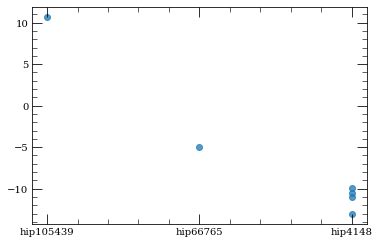

In [17]:
plt.scatter(tab['name'], tab['Vrad'], alpha = 0.75)

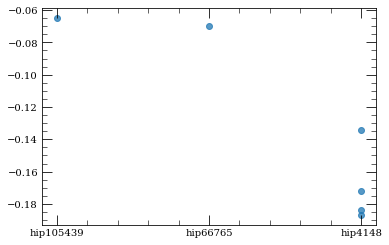

In [18]:
plt.scatter(tab['name'], tab['FeH'], alpha = 0.75)

In [19]:
plt.scatter(tab['name'], tab['Vrot'], alpha = 0.75)

In [20]:
plt.scatter(tab['name'], tab['Av'], alpha = 0.75)